In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the file path
df = pd.read_csv("CC GENERAL.csv")


# Display the first few rows of the dataset
print(df.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
# This function performs a missing value analysis on each column of the dataset, helps you decide on what to do in cleaning process
def null_check(df):
    null_columns = []
    for column in df.columns:
        print("Column Name:", column)
        print("Column DataType:", df[column].dtype)
        if df[column].dtype != 'float64':
            print("Column unique values:", df[column].unique())
        print("Column has null:", df[column].isnull().any())
        if df[column].isnull().any() == True:
            print("Column Null Count:", df[column].isnull().sum())
            null_columns.append(column)
        print("\n")
    return null_columns

null_cols = null_check(df)

Column Name: CUST_ID
Column DataType: object
Column unique values: ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
Column has null: False


Column Name: BALANCE
Column DataType: float64
Column has null: False


Column Name: BALANCE_FREQUENCY
Column DataType: float64
Column has null: False


Column Name: PURCHASES
Column DataType: float64
Column has null: False


Column Name: ONEOFF_PURCHASES
Column DataType: float64
Column has null: False


Column Name: INSTALLMENTS_PURCHASES
Column DataType: float64
Column has null: False


Column Name: CASH_ADVANCE
Column DataType: float64
Column has null: False


Column Name: PURCHASES_FREQUENCY
Column DataType: float64
Column has null: False


Column Name: ONEOFF_PURCHASES_FREQUENCY
Column DataType: float64
Column has null: False


Column Name: PURCHASES_INSTALLMENTS_FREQUENCY
Column DataType: float64
Column has null: False


Column Name: CASH_ADVANCE_FREQUENCY
Column DataType: float64
Column has null: False


Column Name: CASH_ADVANCE_

There are very few null values in credit limit and minimum payments column. Lets impute these values later.

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
# displaying data types, null values, and possible outliers in each column
def dataframe_summary():
    
    # lists
    var_list = df.columns.to_list()
    dtype_list = []
    null_list = []
    
    # looping through columns
    for col in df.columns:
        dtype_list.append(df[col].dtype)
        null_list.append(df[col].isnull().sum())
    
    # outliers IQR
    Q1 = df.quantile(.25)
    Q3 = df.quantile(.75)
    IQR = Q3 - Q1
    k = 1.5
    outlier_list = ((df < (Q1 - k * IQR)) | (df > (Q3 + k * IQR))).sum().to_list()
    
    # stacking lists into dictionary
    dict = {'Variable': var_list, 'Data type': dtype_list, 'Null values': null_list, 'Outliers': outlier_list}
    
    return pd.DataFrame(dict).style.hide_index()
    
dataframe_summary()

C:\Users\lenovo1\AppData\Local\Temp\ipykernel_2404\3884873115.py:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(.25)
C:\Users\lenovo1\AppData\Local\Temp\ipykernel_2404\3884873115.py:18: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(.75)
C:\Users\lenovo1\AppData\Local\Temp\ipykernel_2404\3884873115.py:21: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_list = ((df < (Q1 - k * IQR)) | (df > (Q3 + k * IQR))).sum().to_list()
C:\Us

In [5]:
df = df.drop(['CUST_ID'],axis = 1)


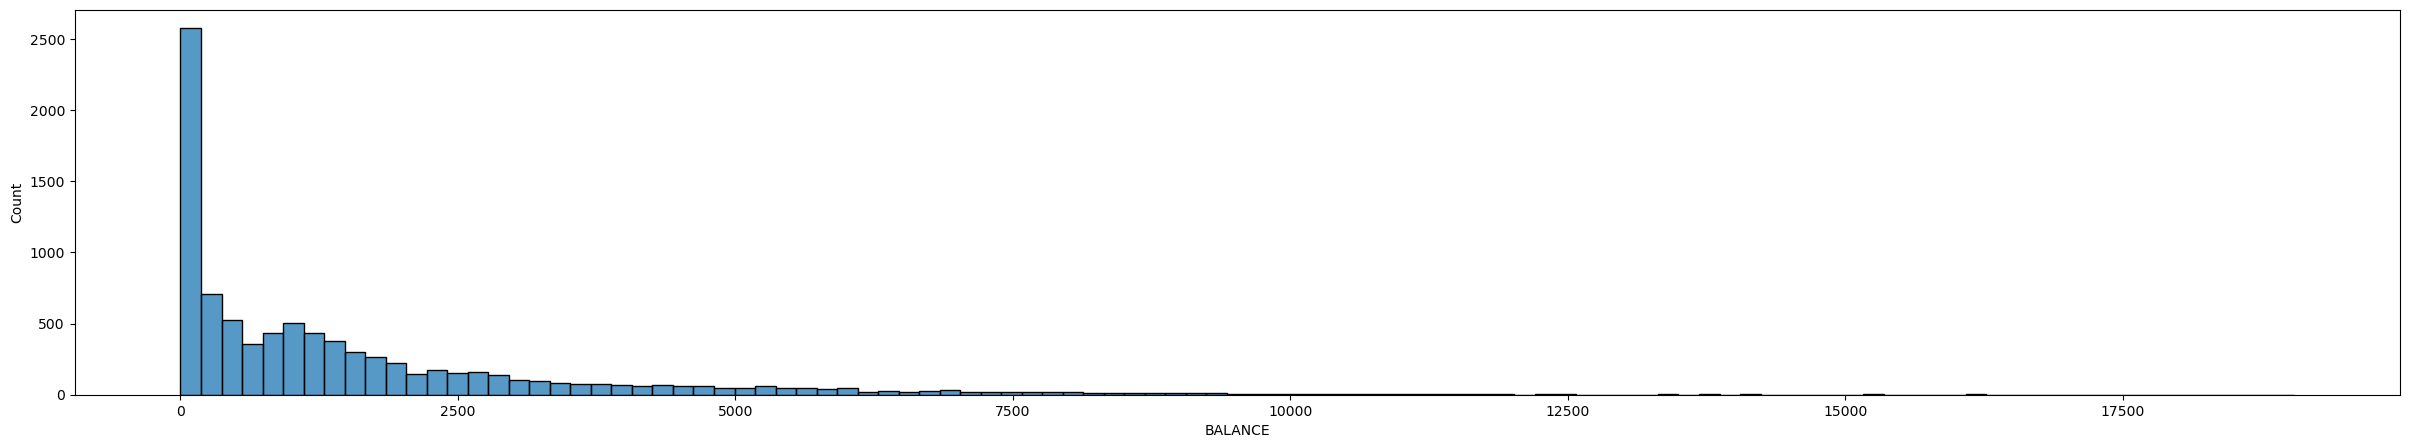

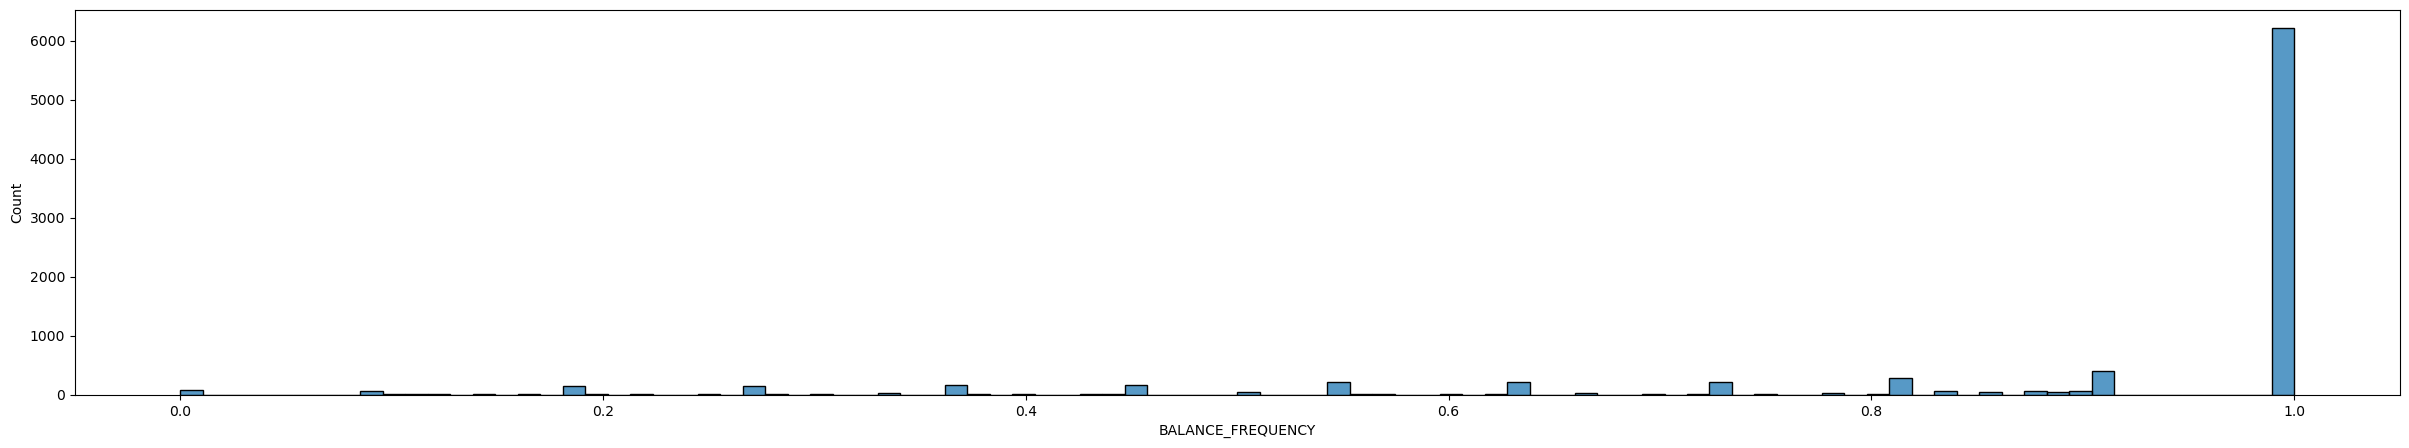

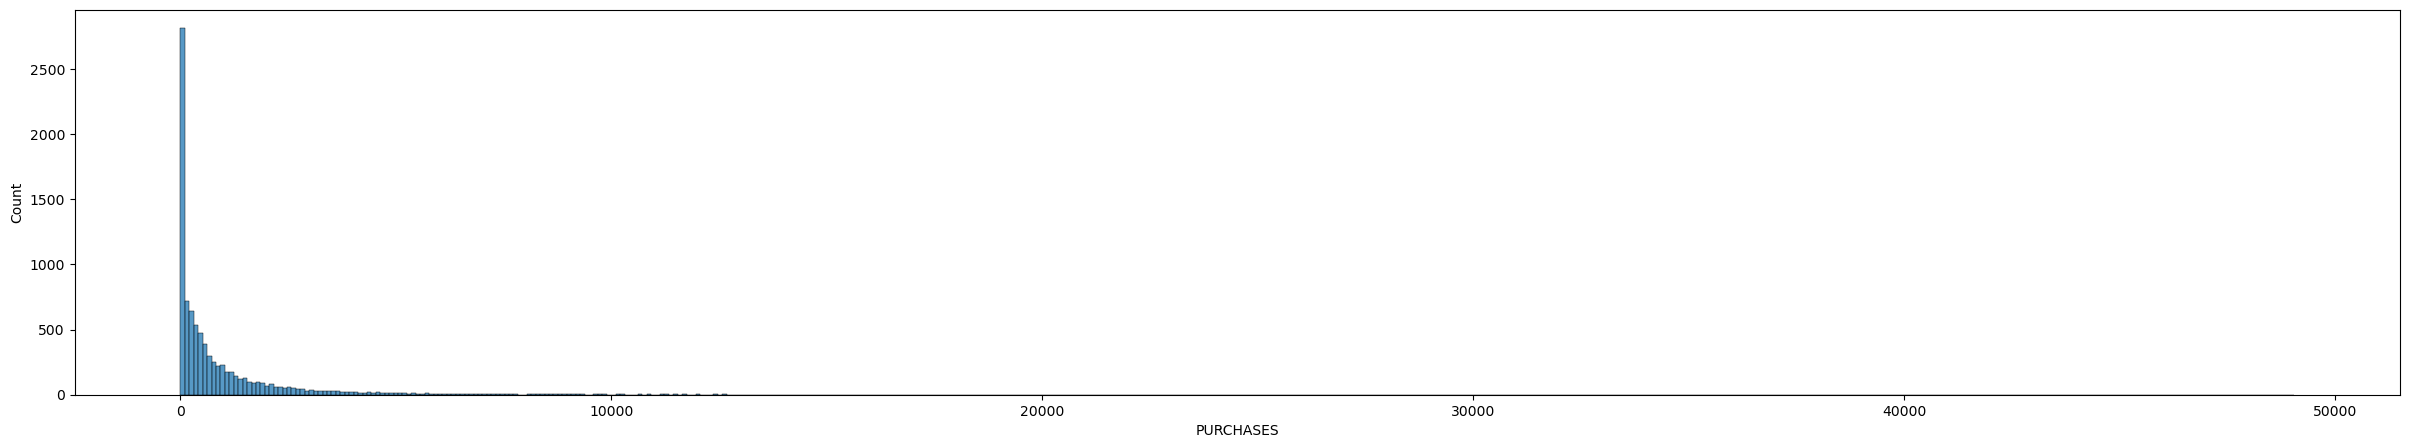

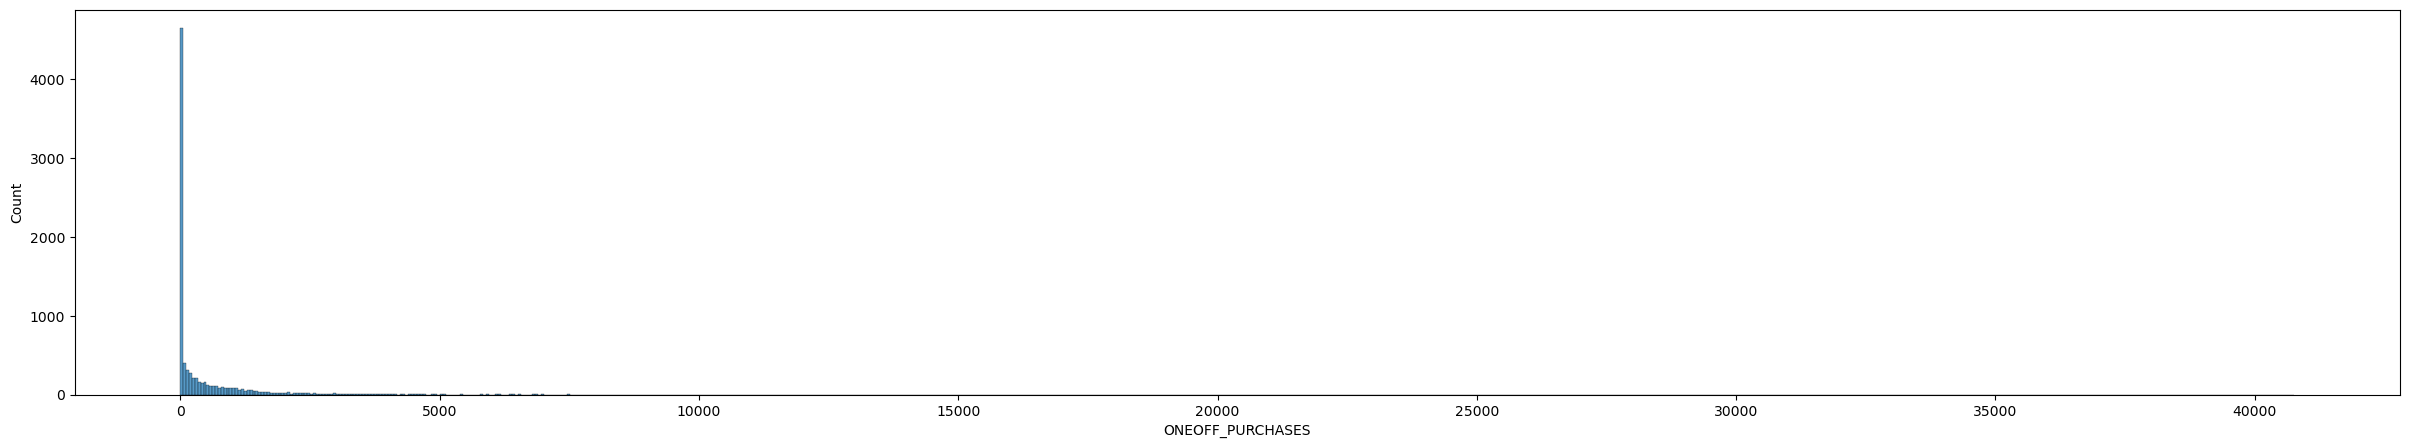

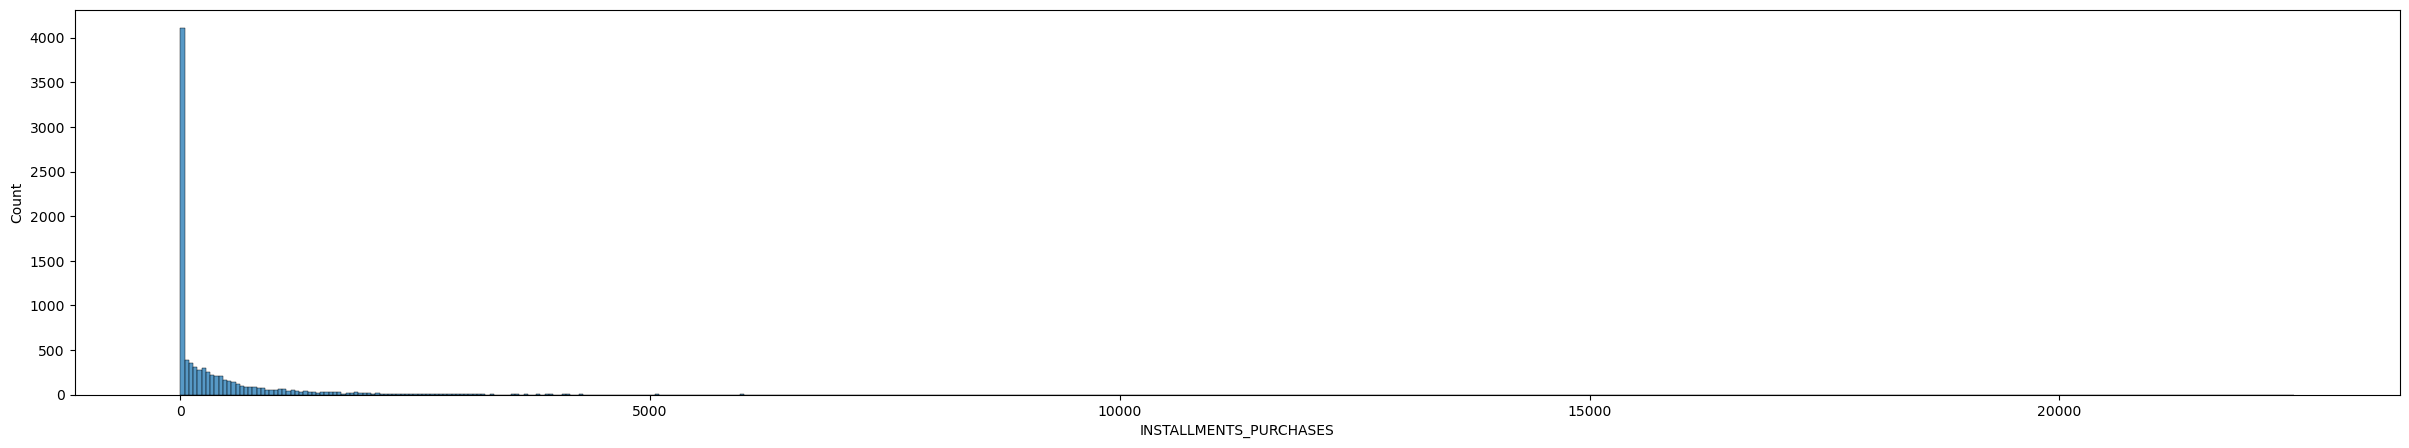

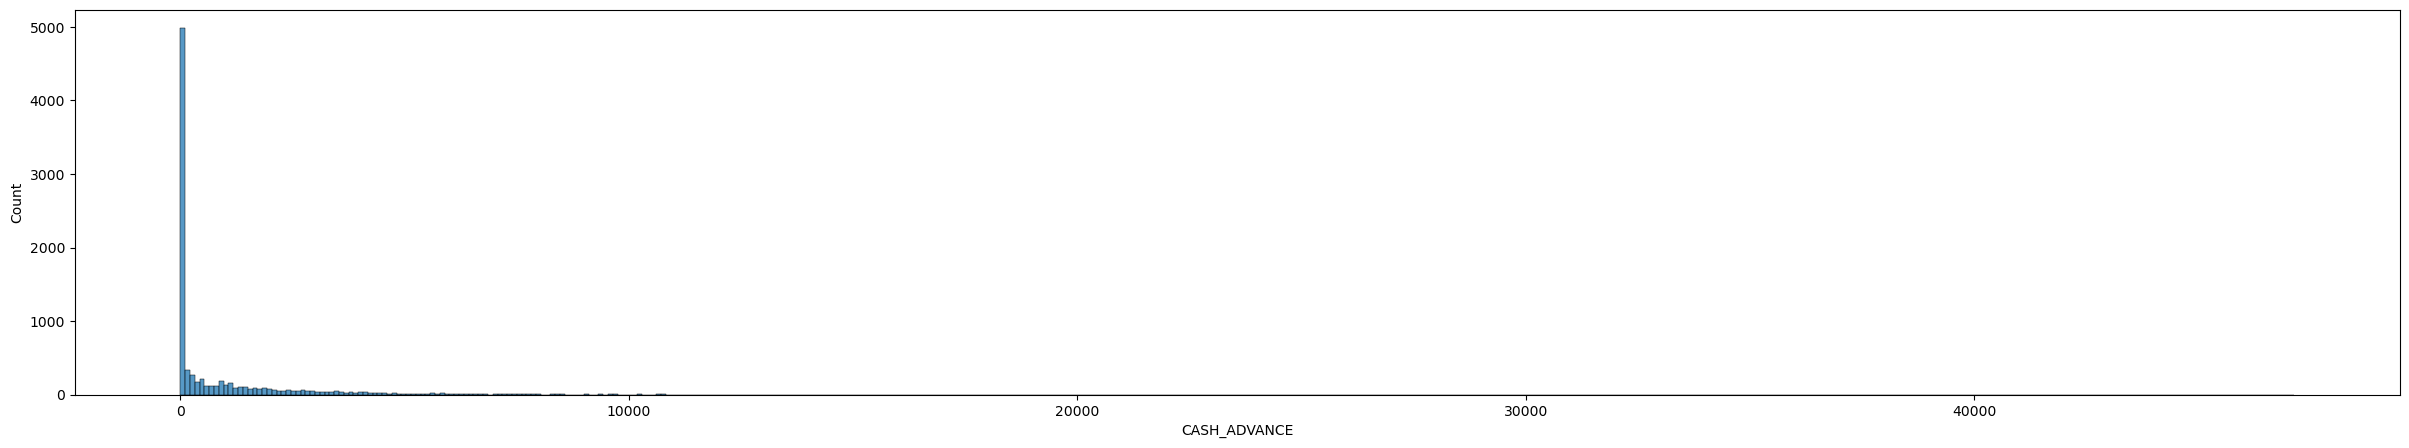

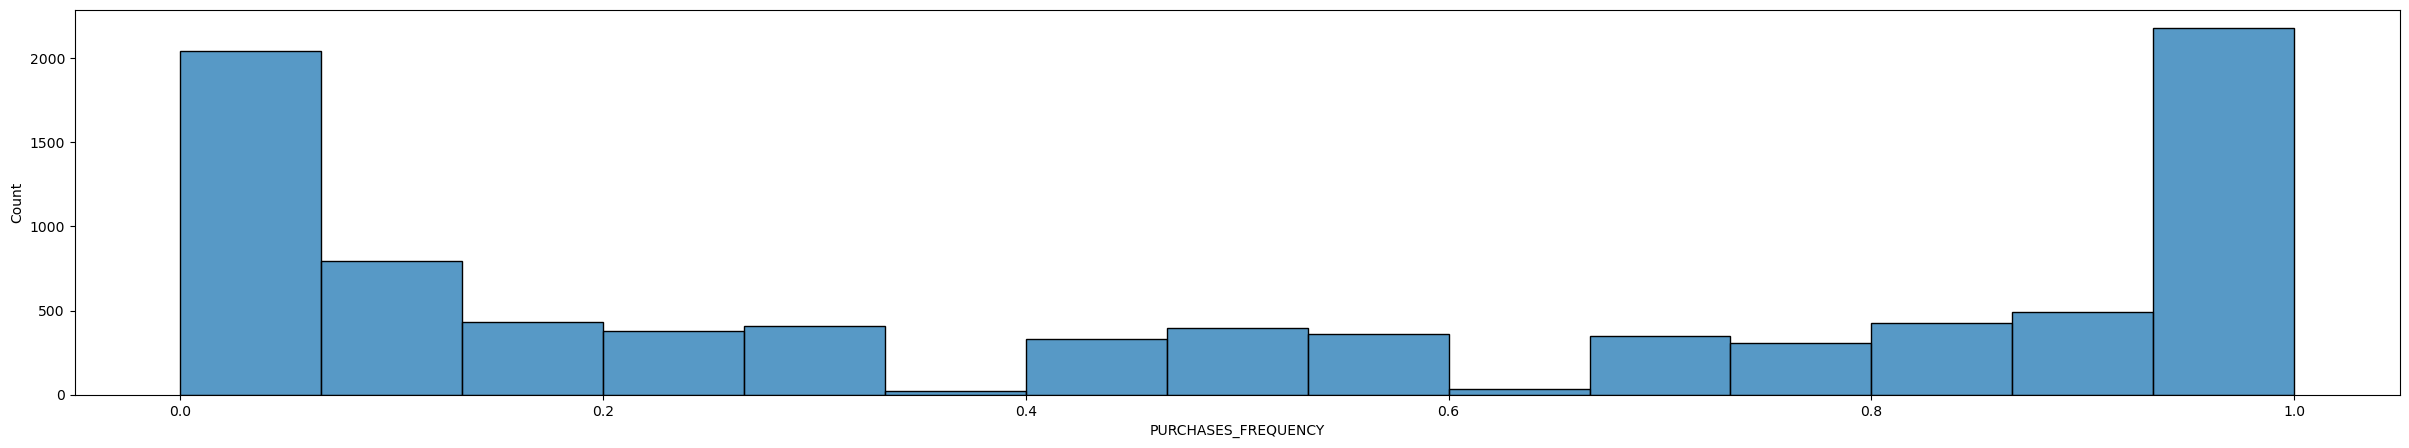

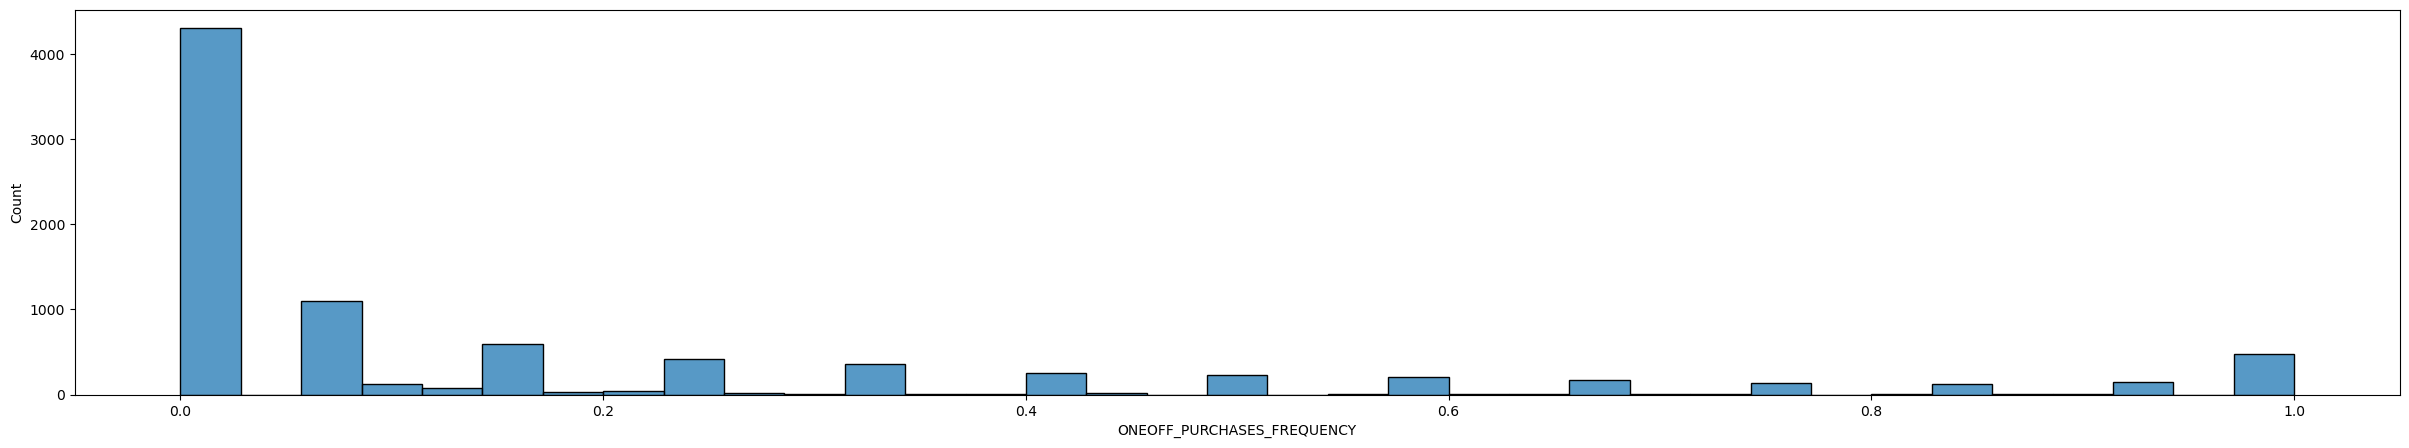

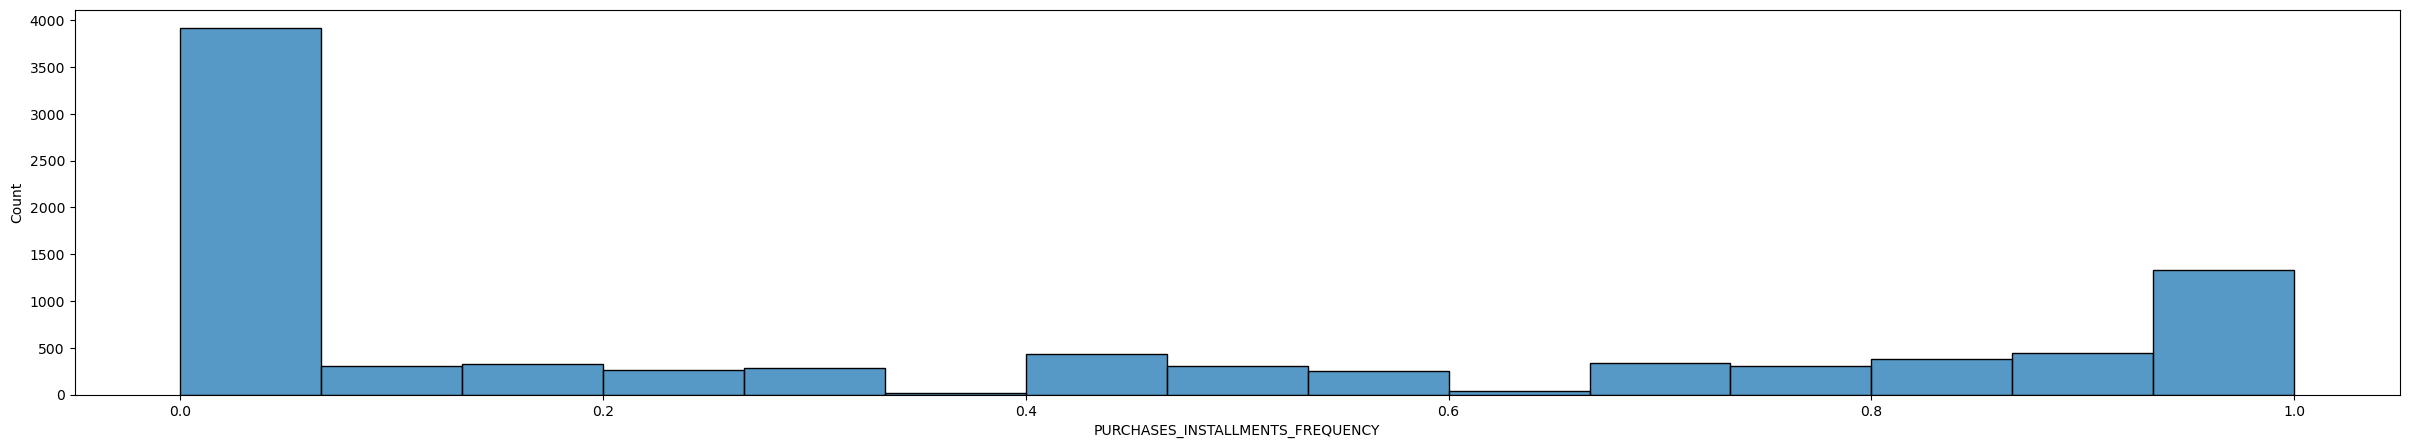

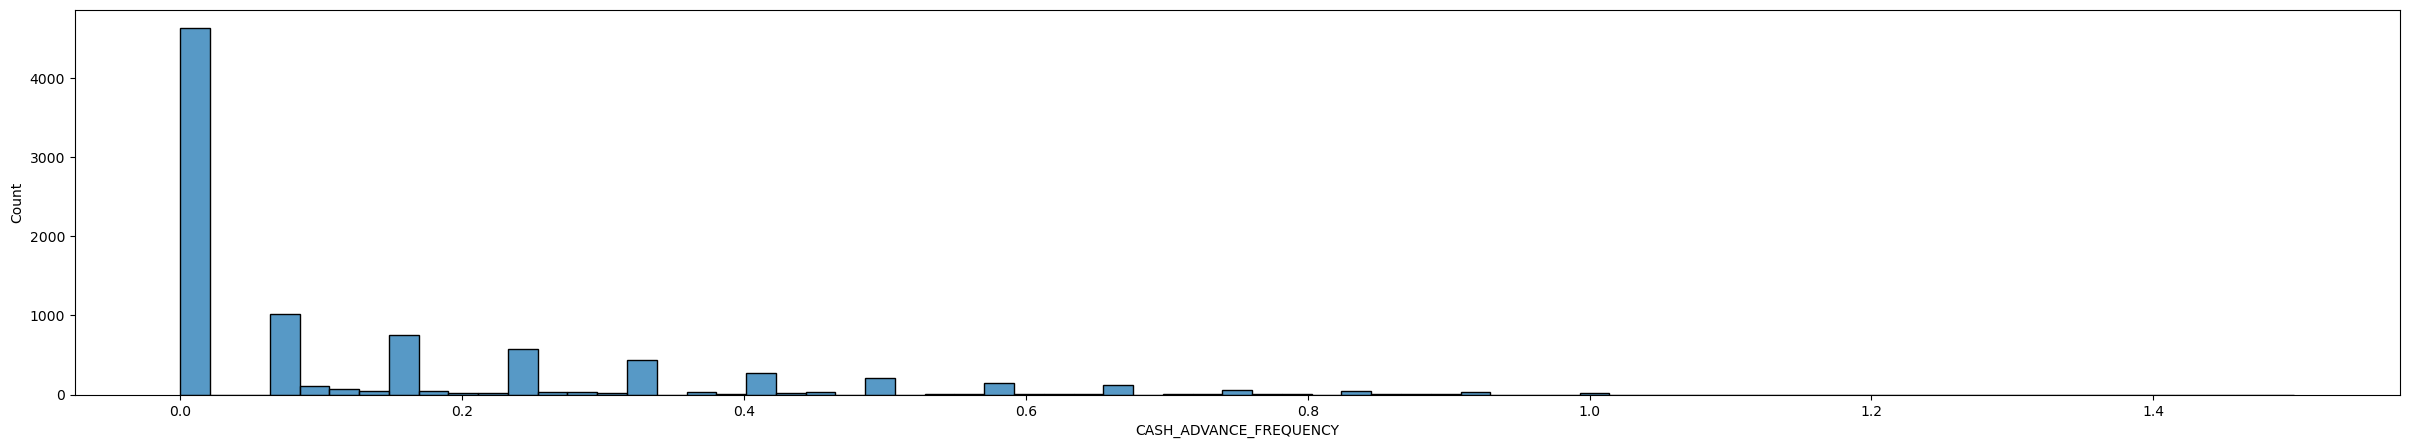

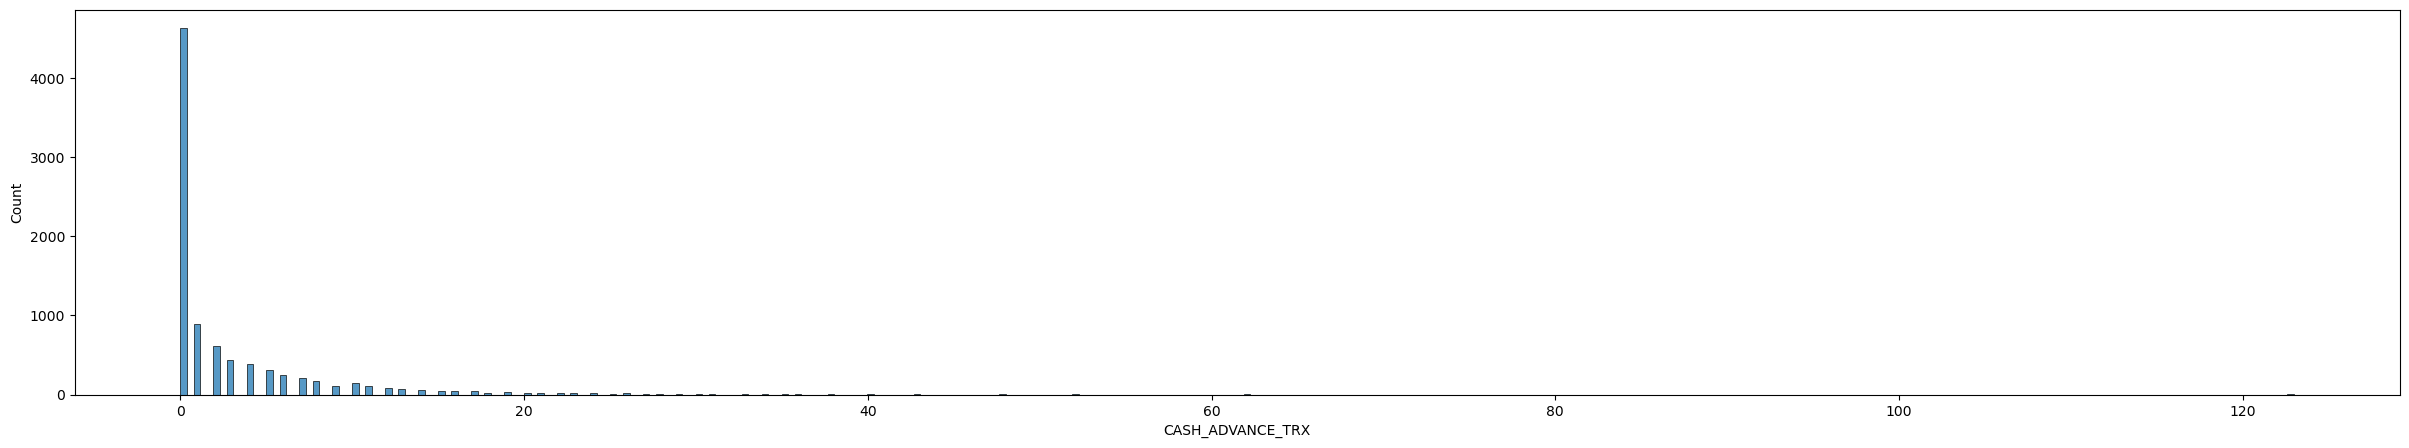

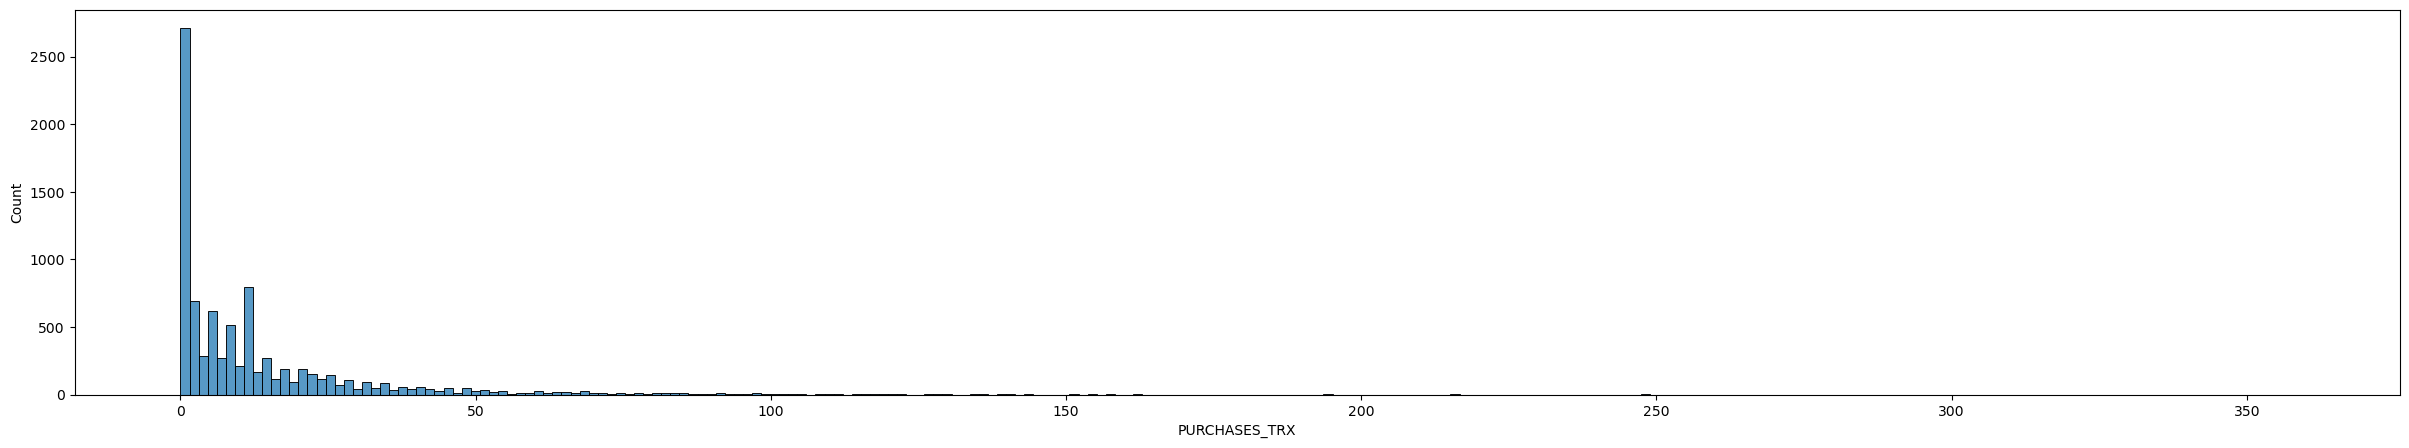

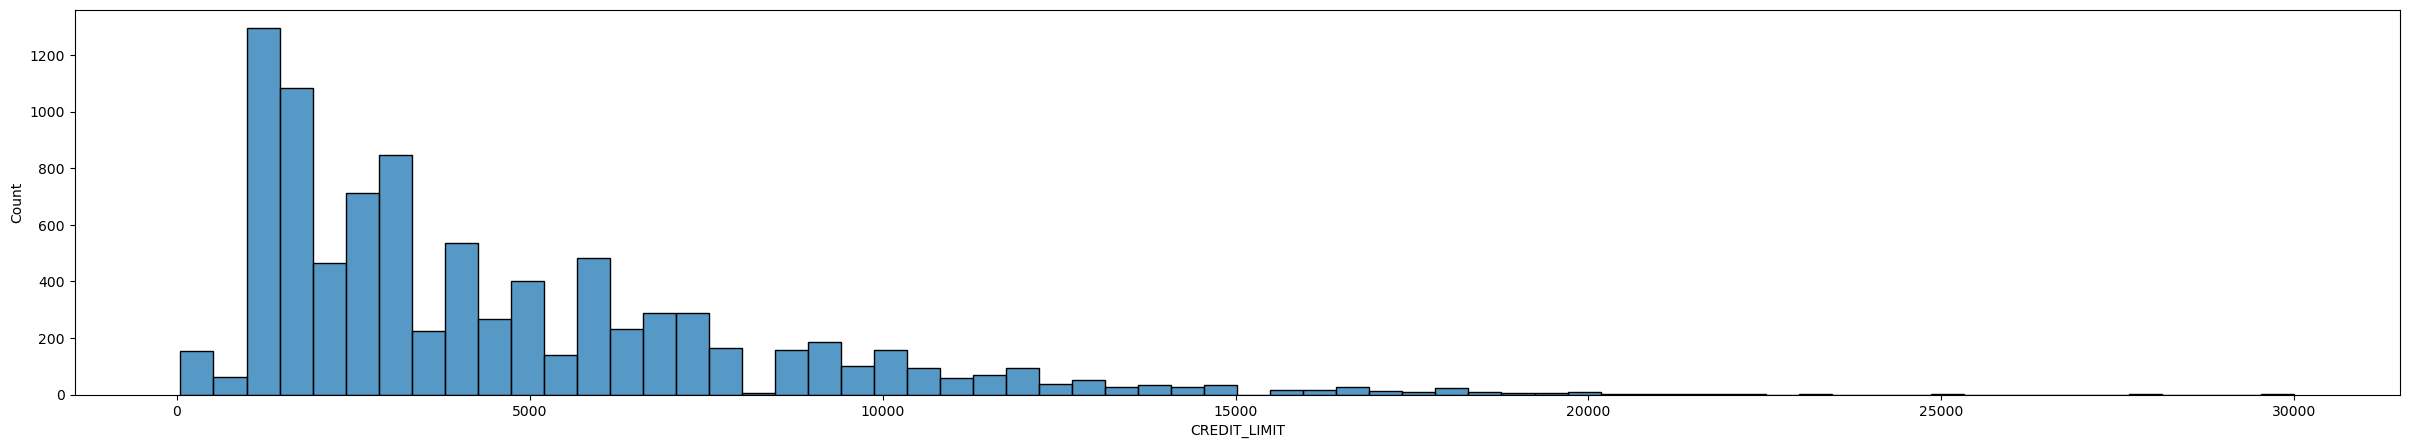

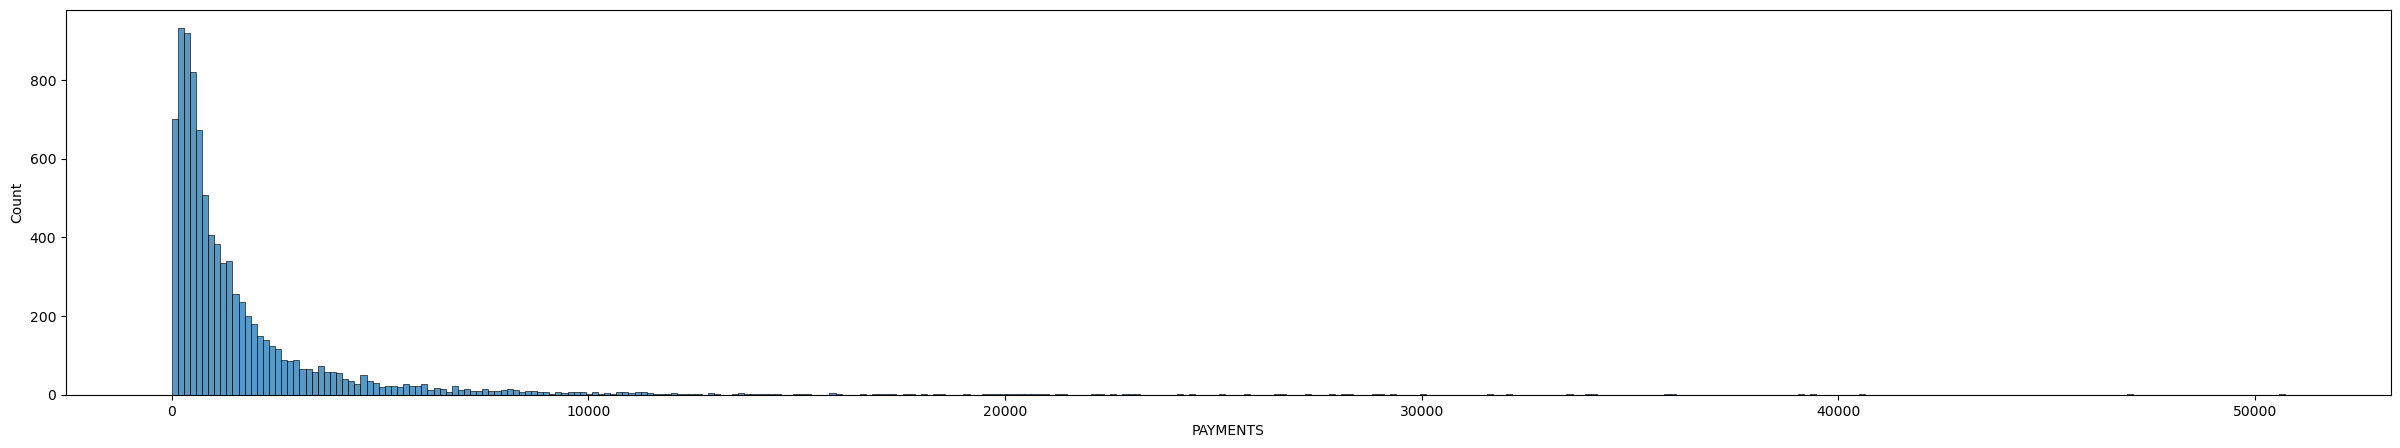

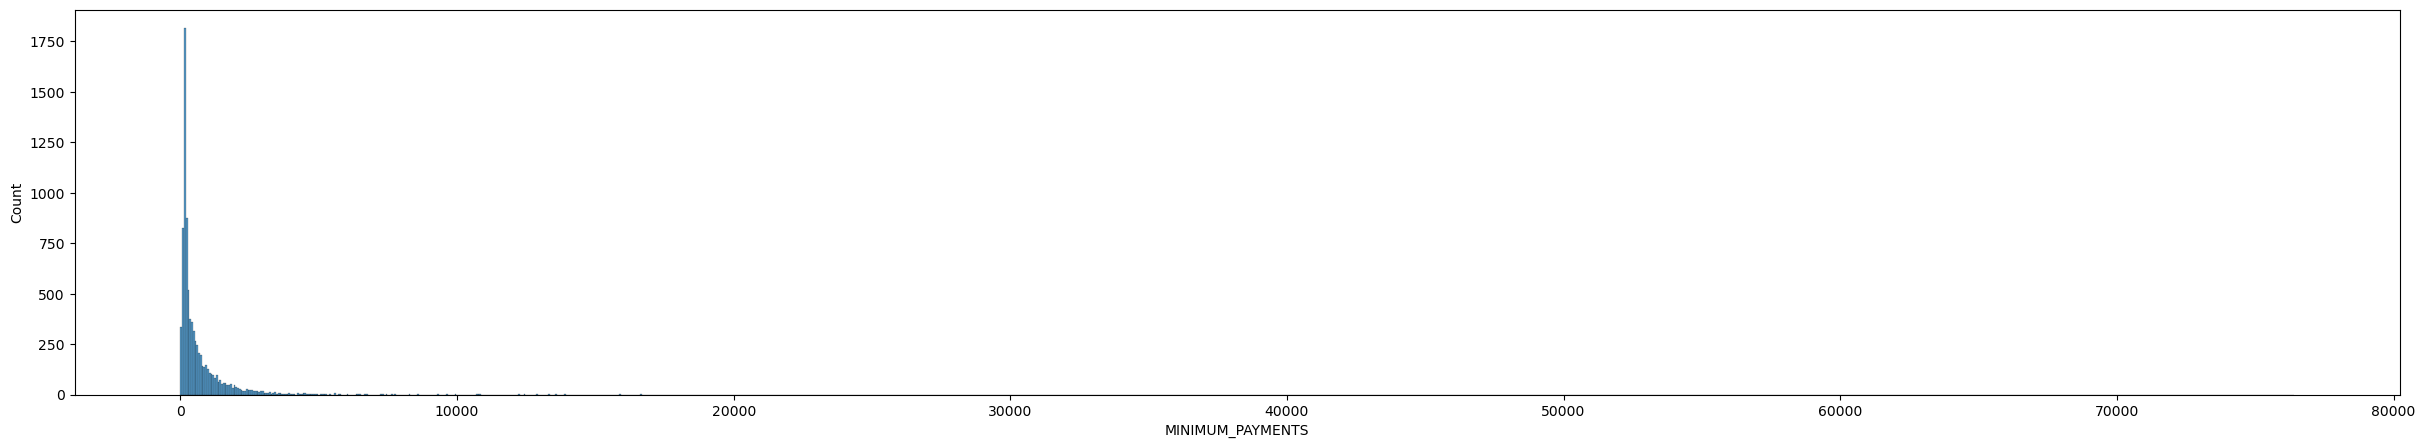

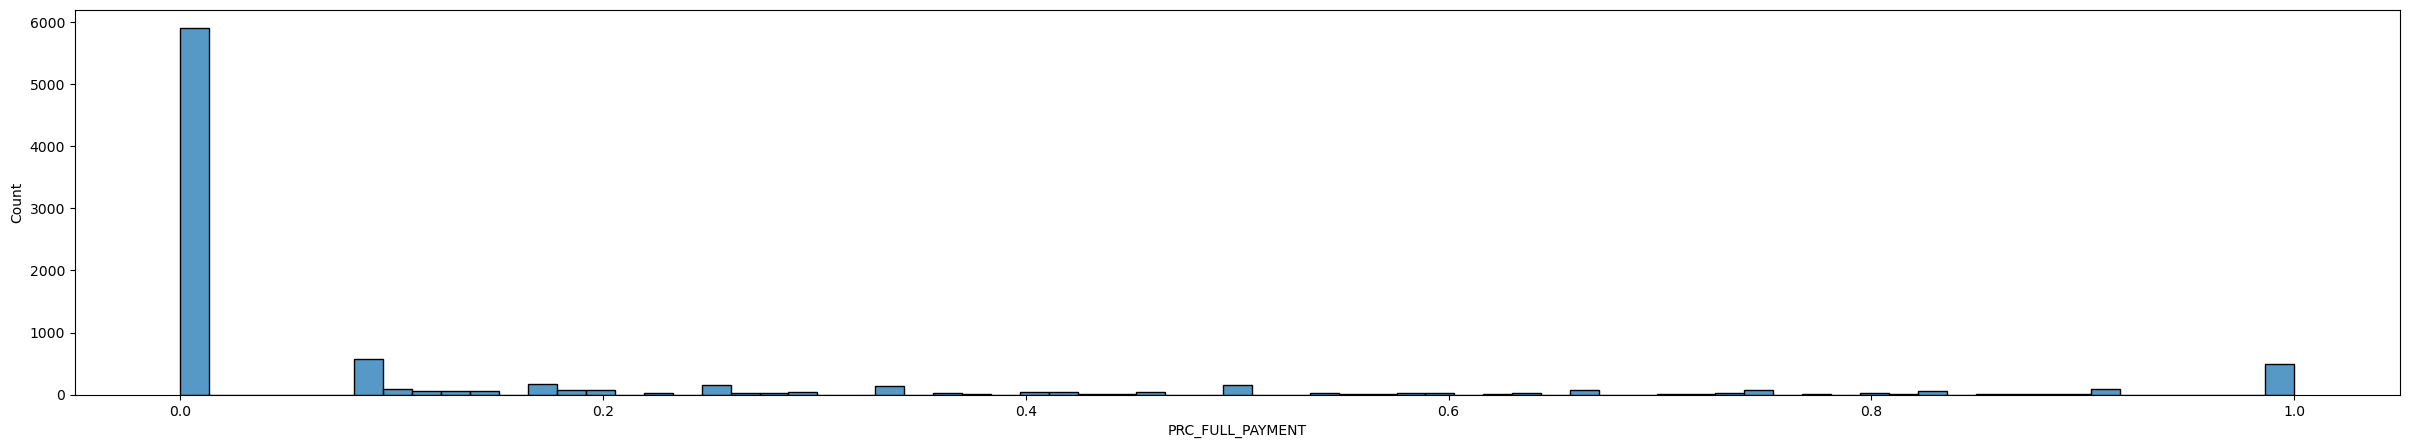

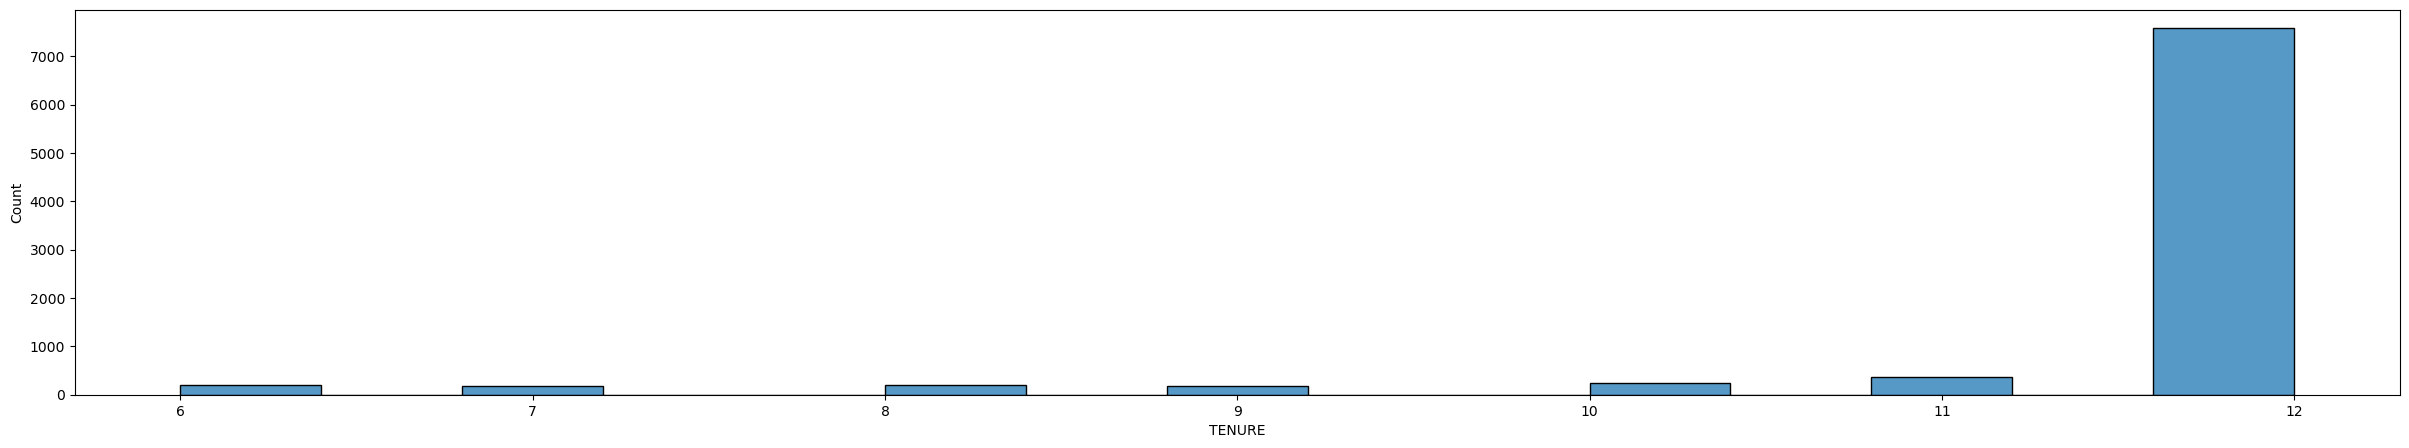

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(df[column])
    plt.show()

Most credit card holders have a low credit limit and keep balances below 7500.

Variables like Purchases, OneOffPurchases, InstallmentPurchases, and Cash Advances follow a similar trend, correlating with lower credit balances.

Majority of users either make no purchases or purchase frequently.

Installment purchases are more common than one-time purchases.

In the past 6 months, most people made payments totaling below 10000, with minimum payments below 5000.

Most credit card holders have had their cards for over 12 months.

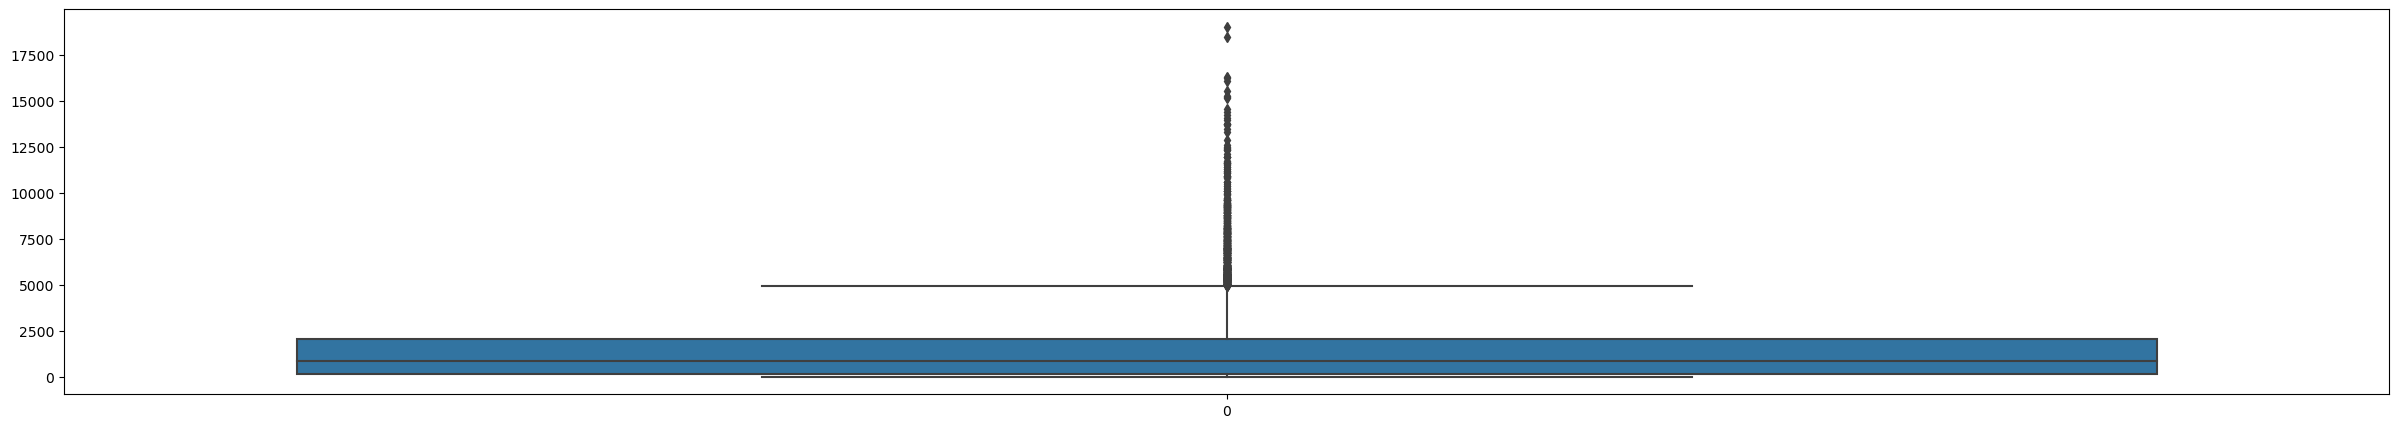

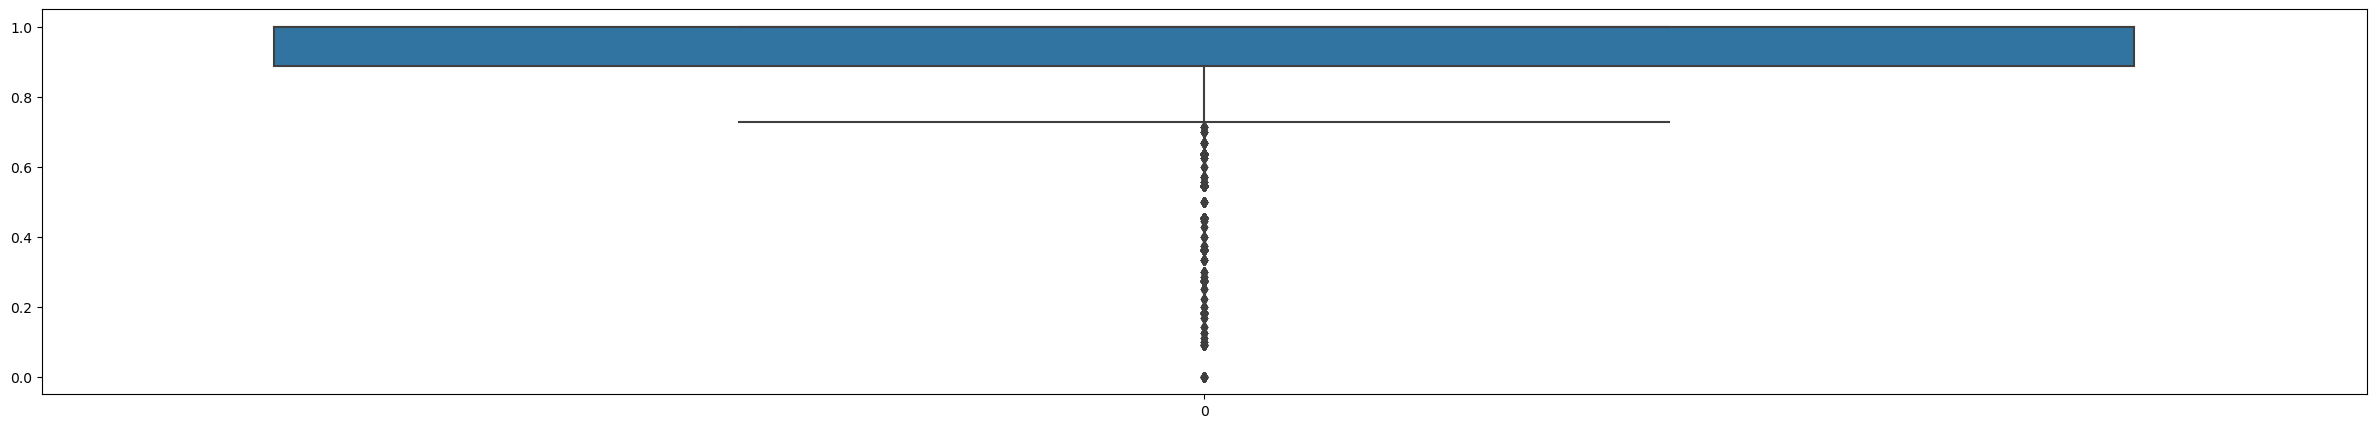

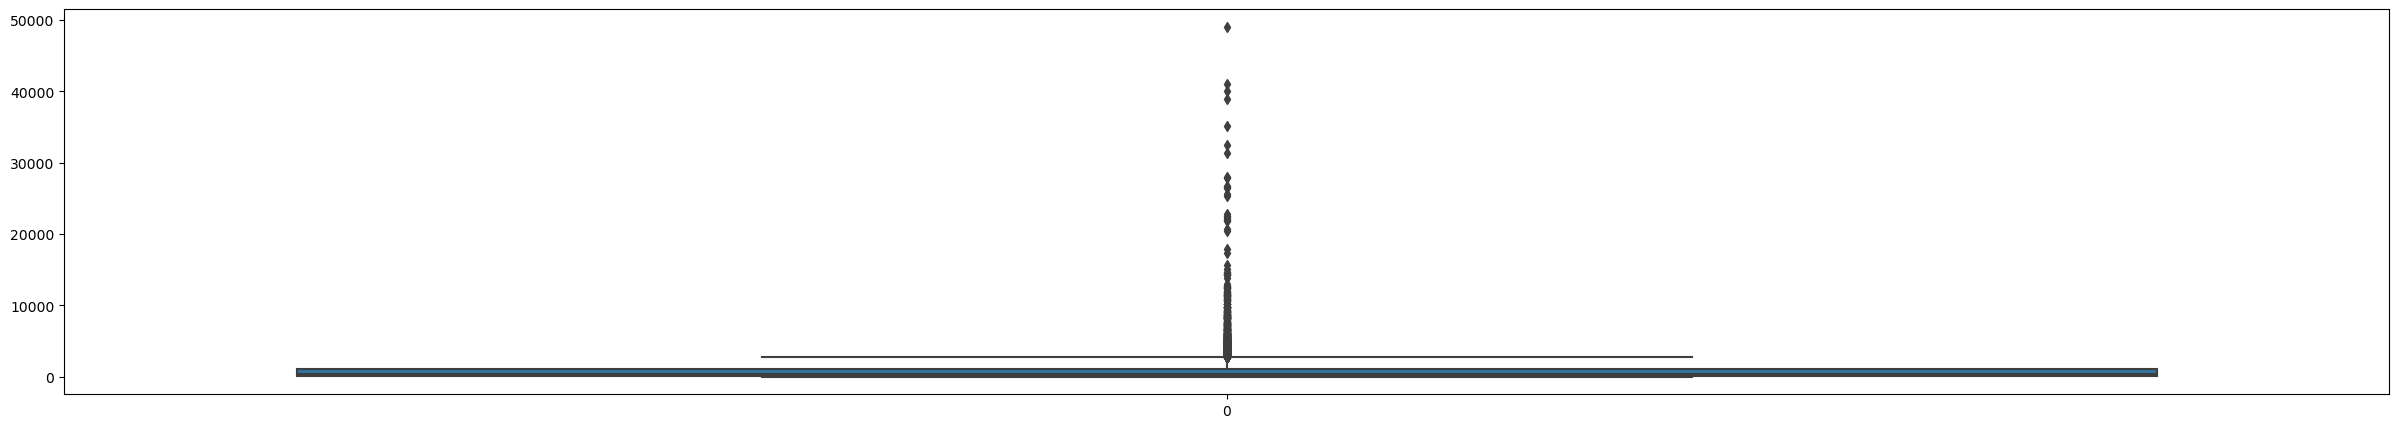

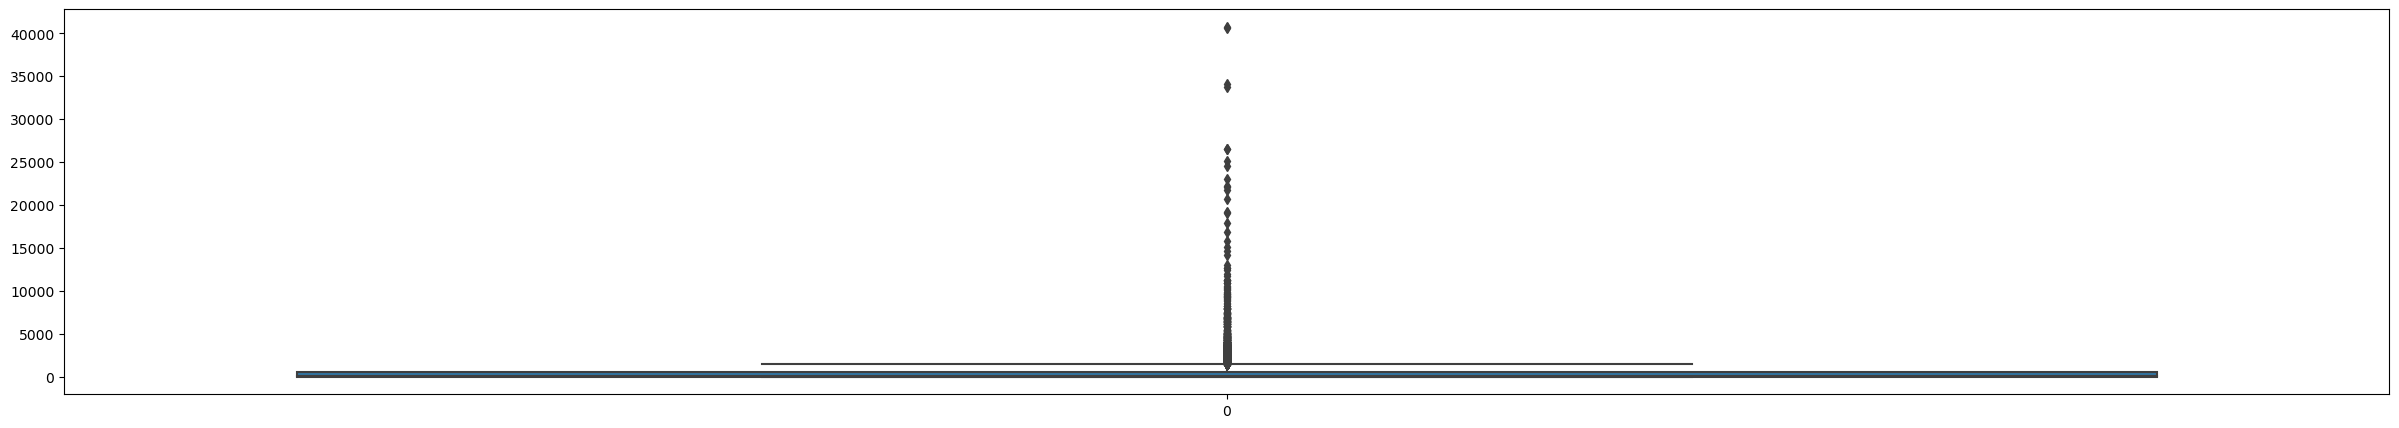

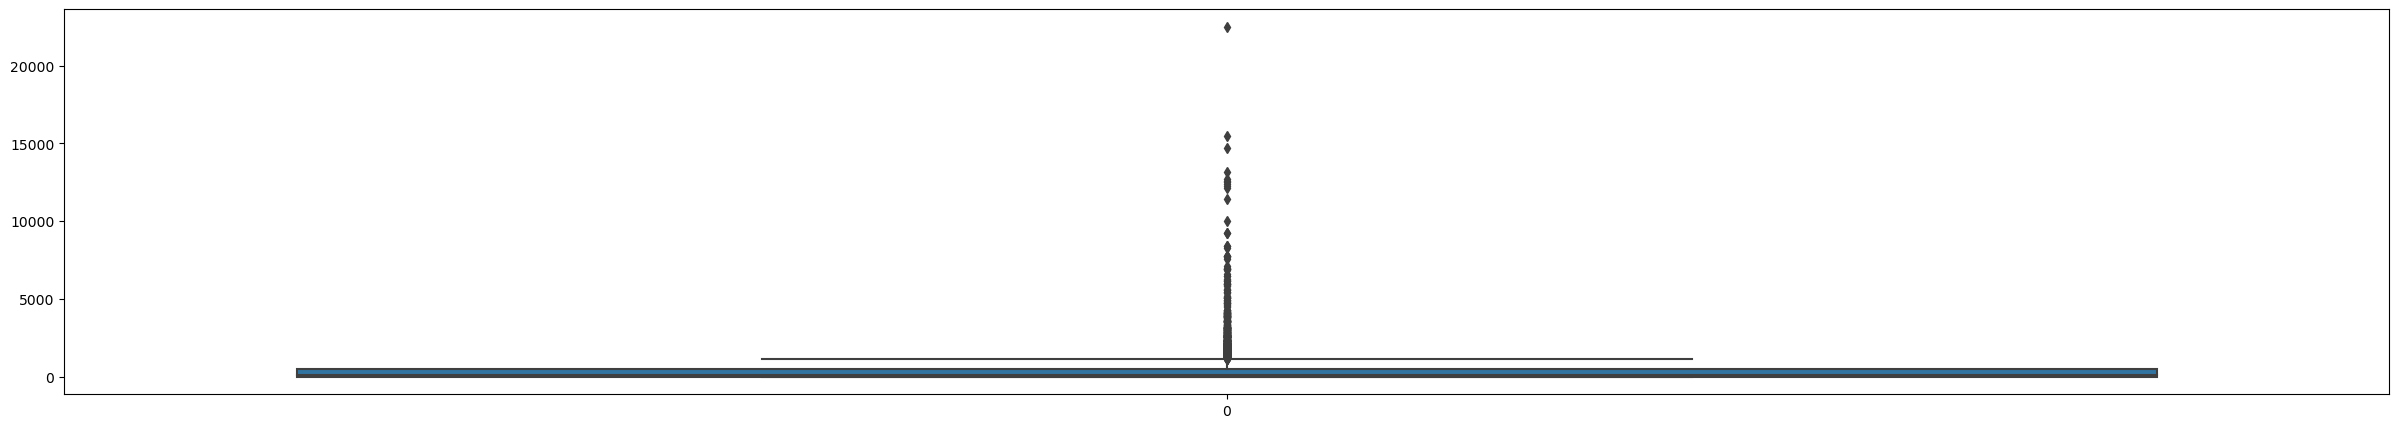

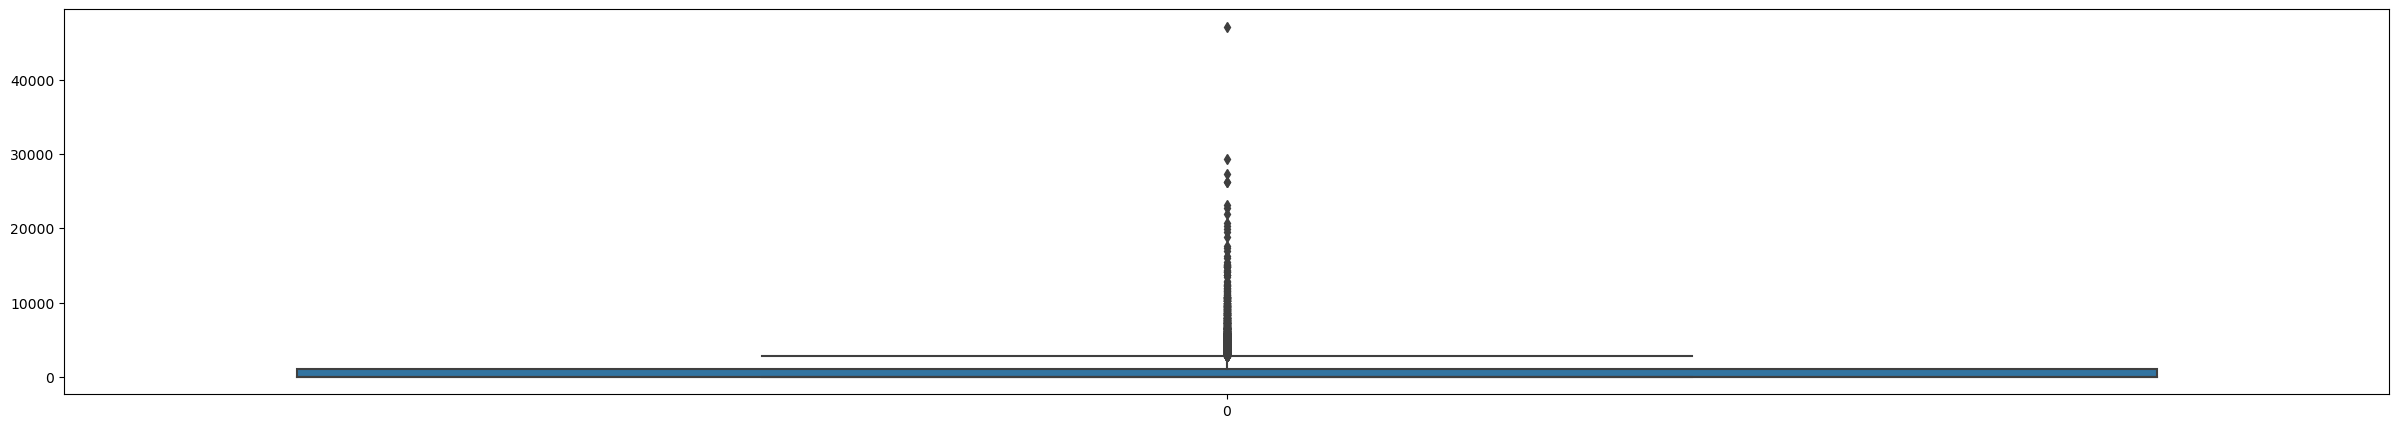

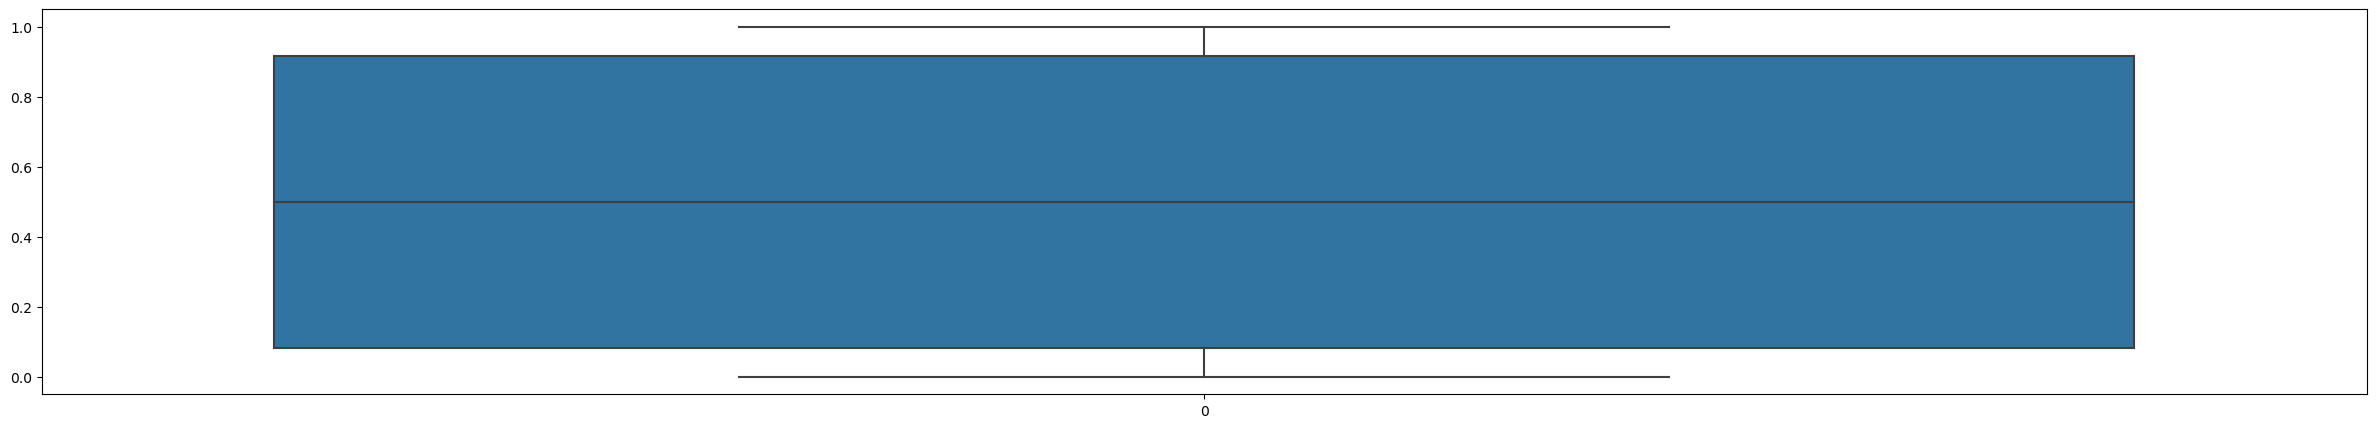

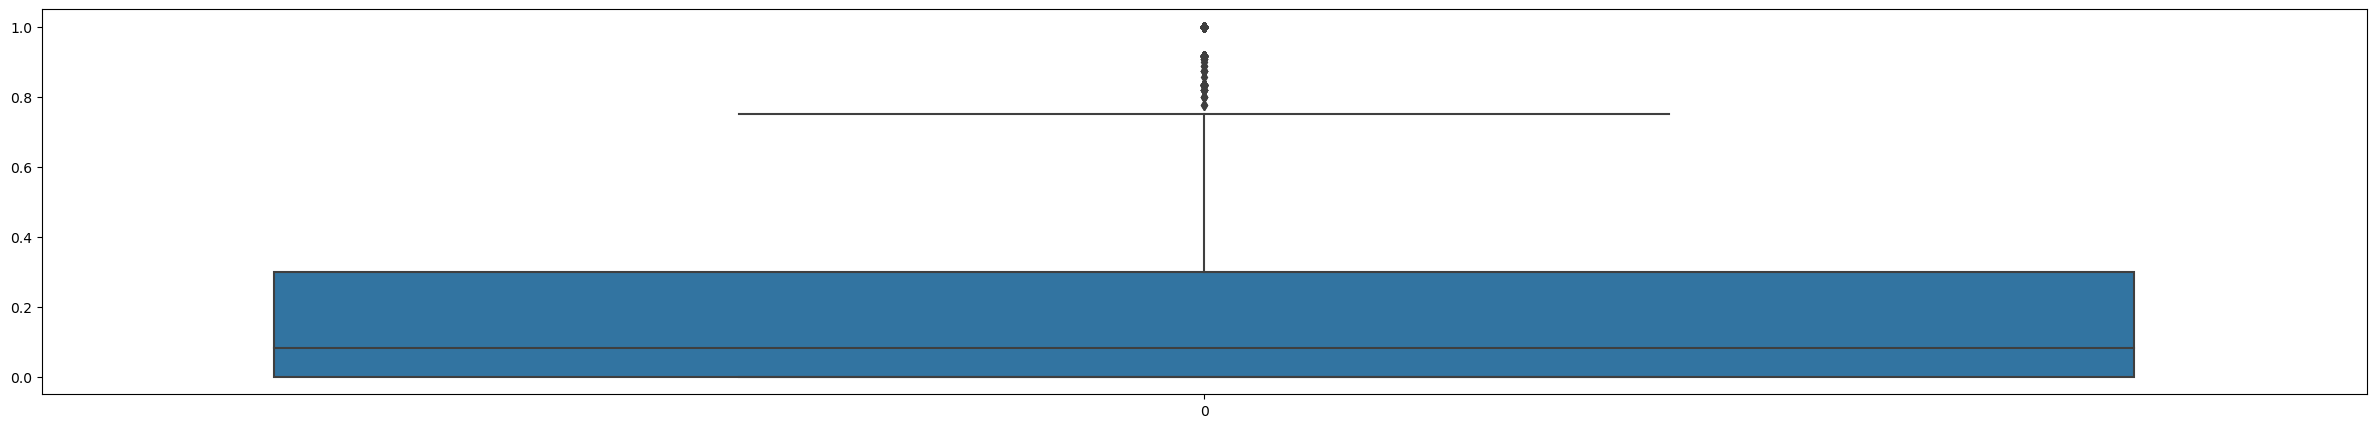

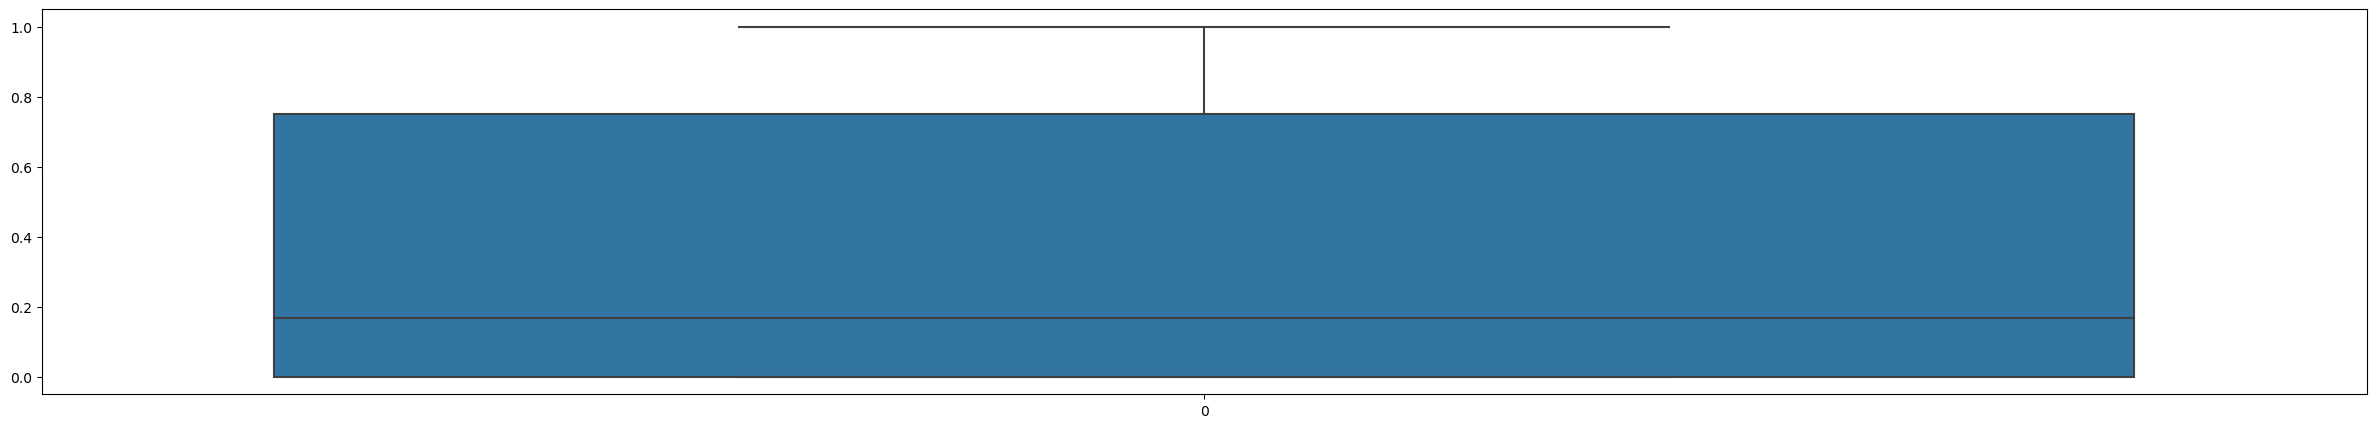

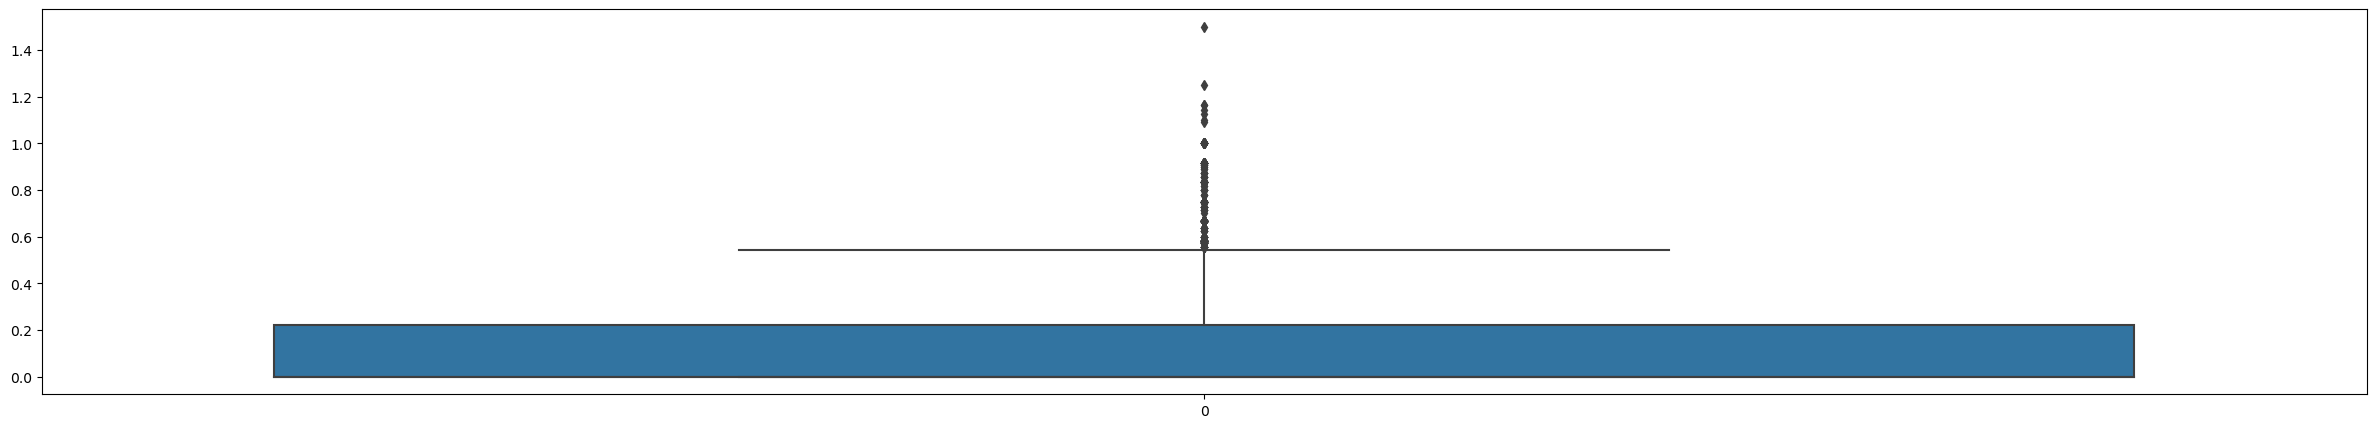

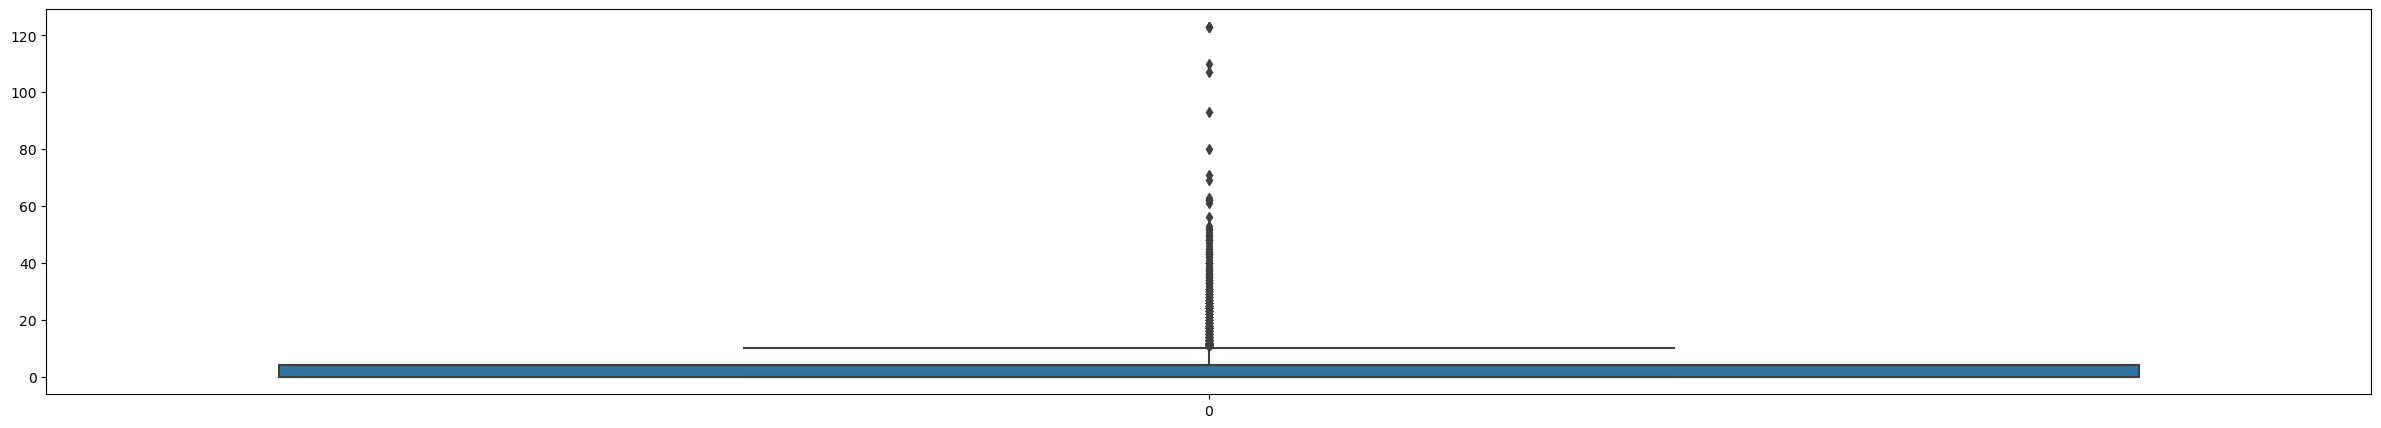

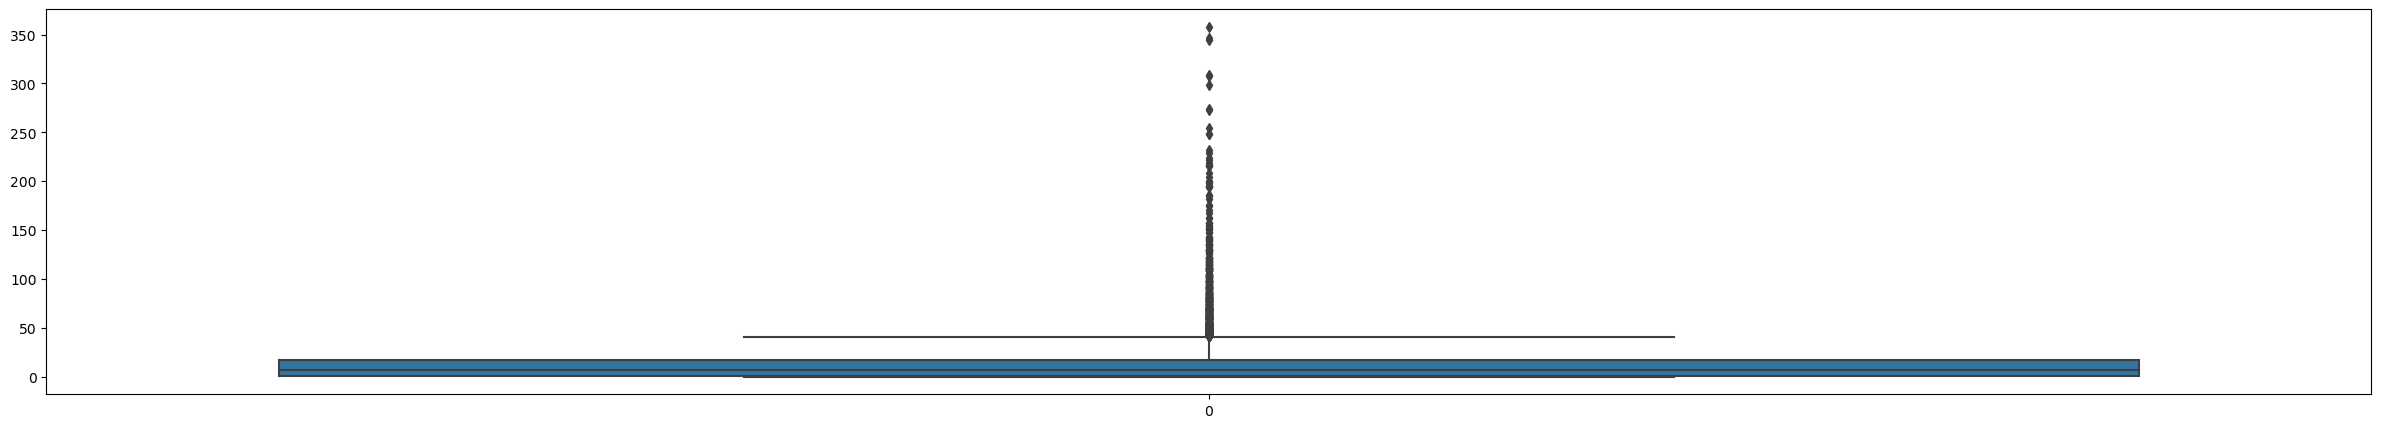

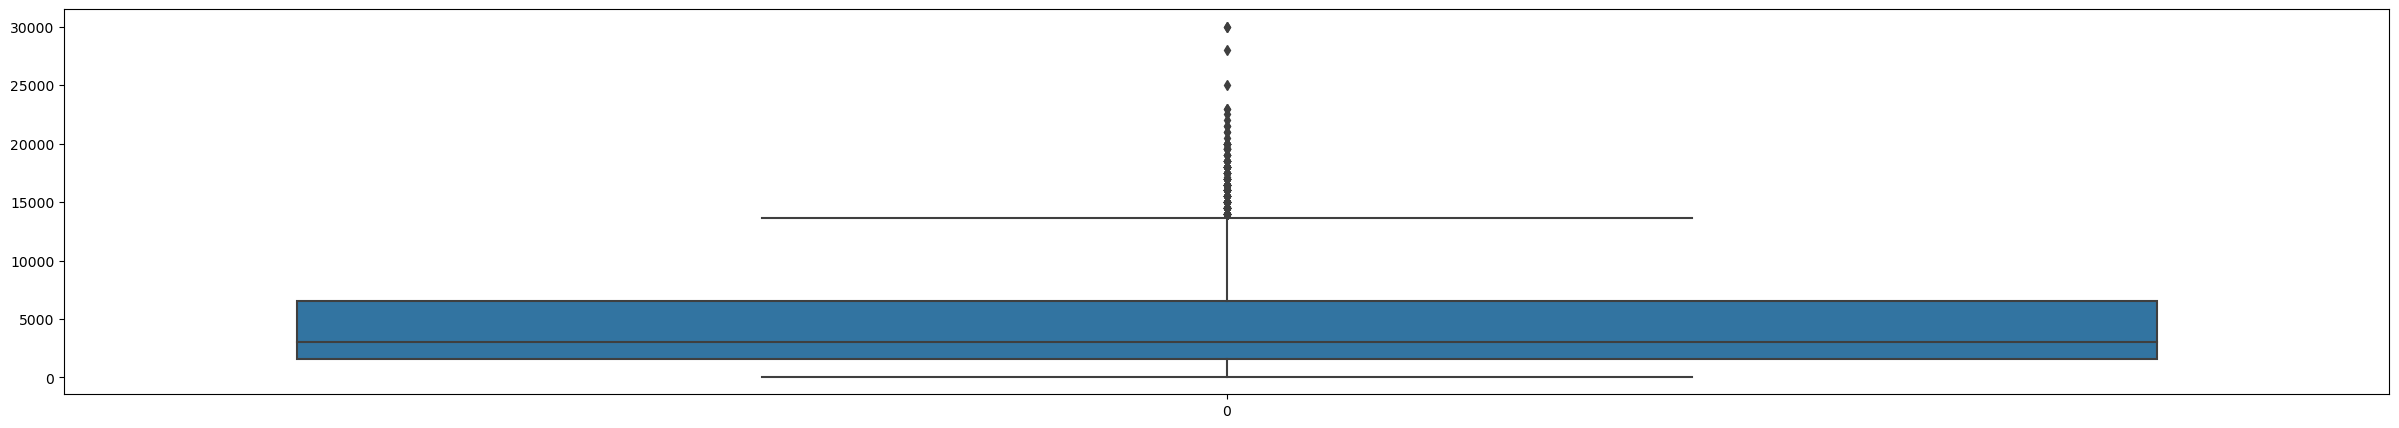

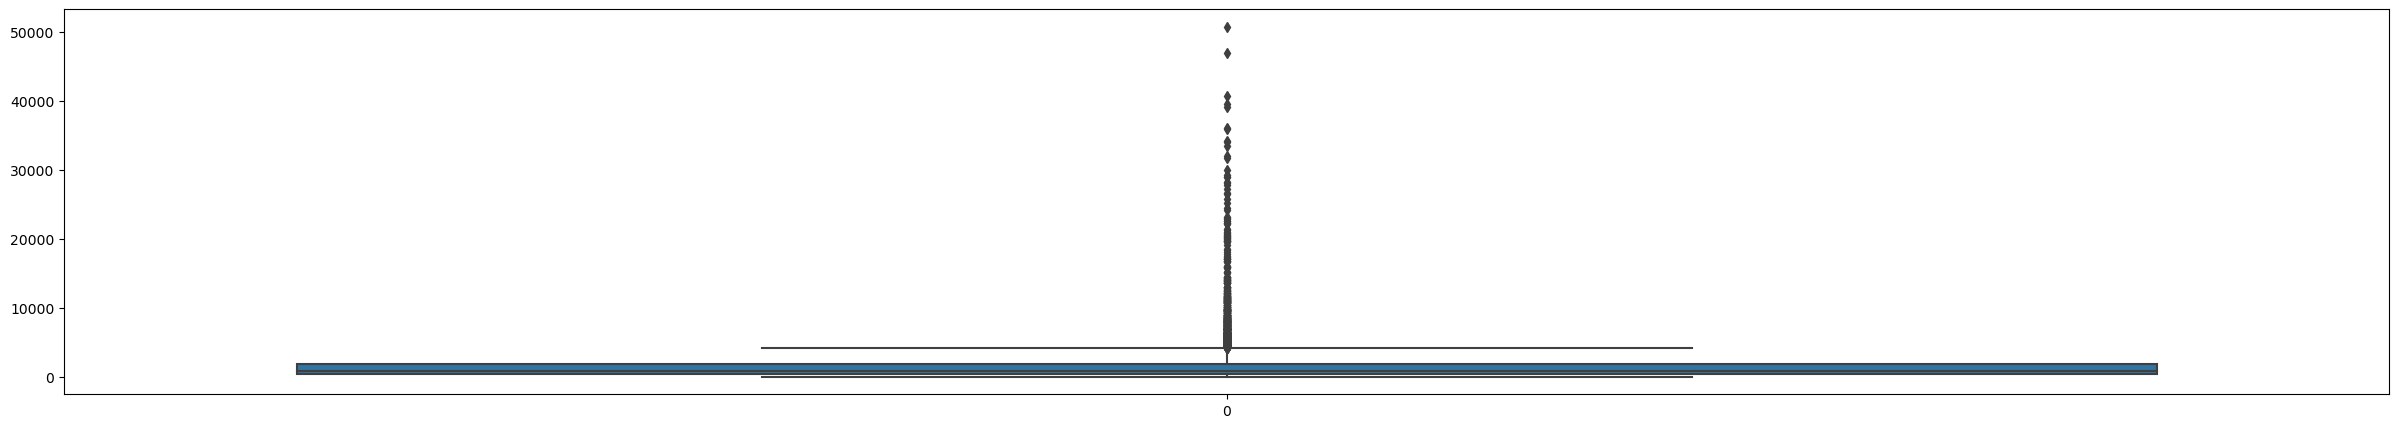

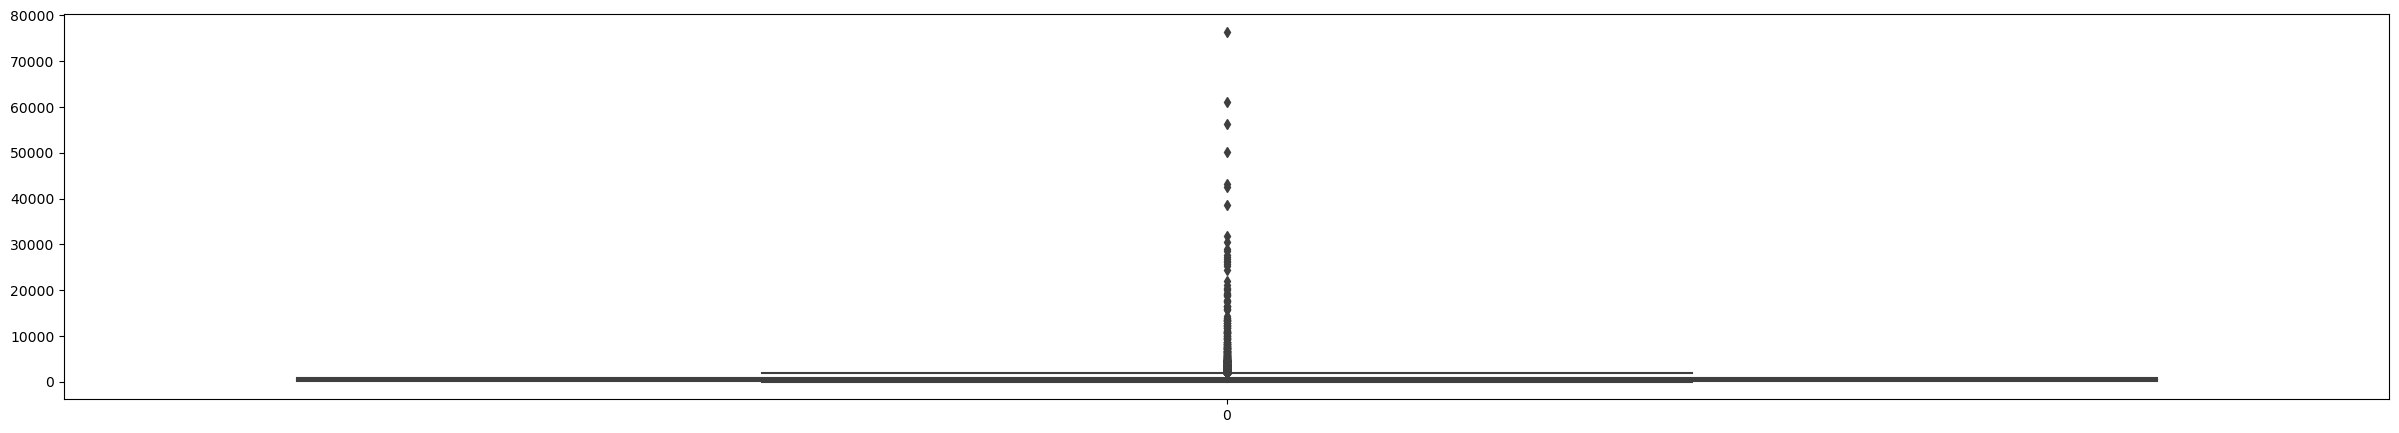

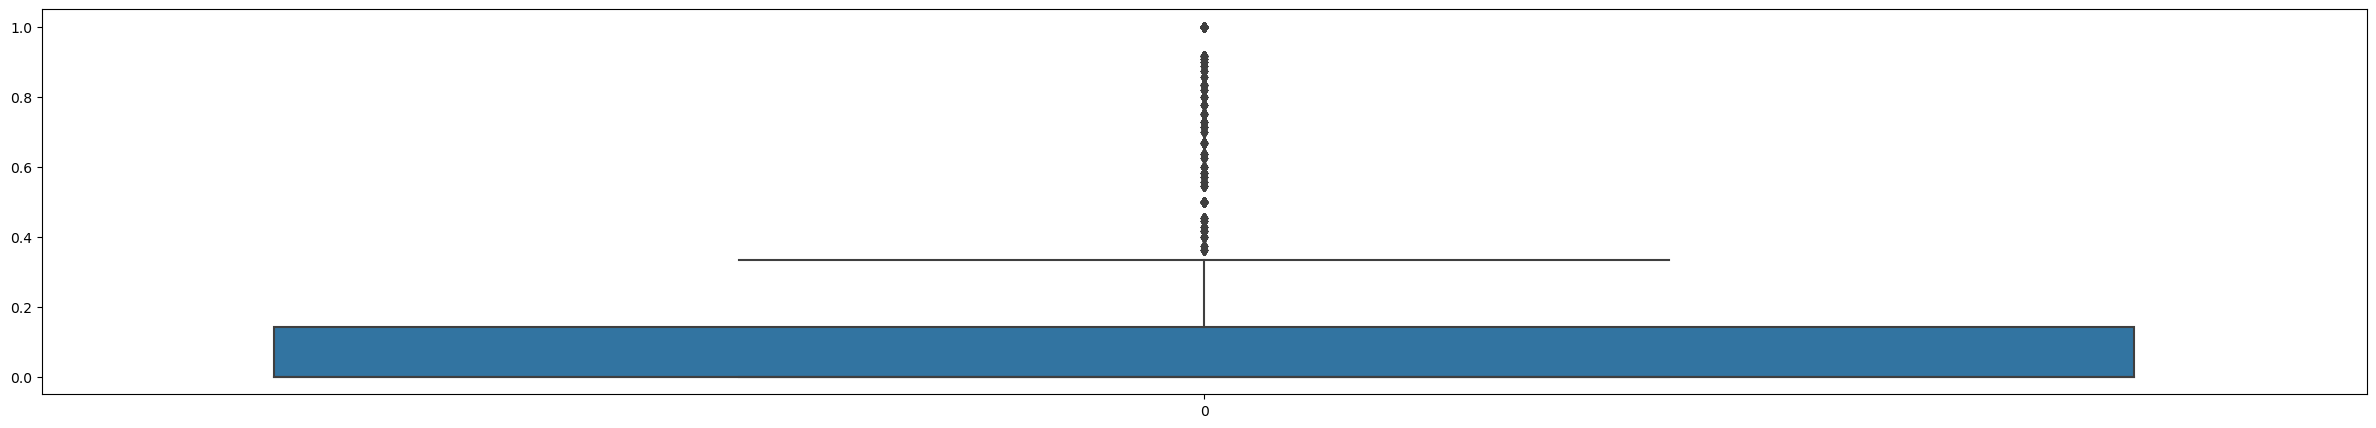

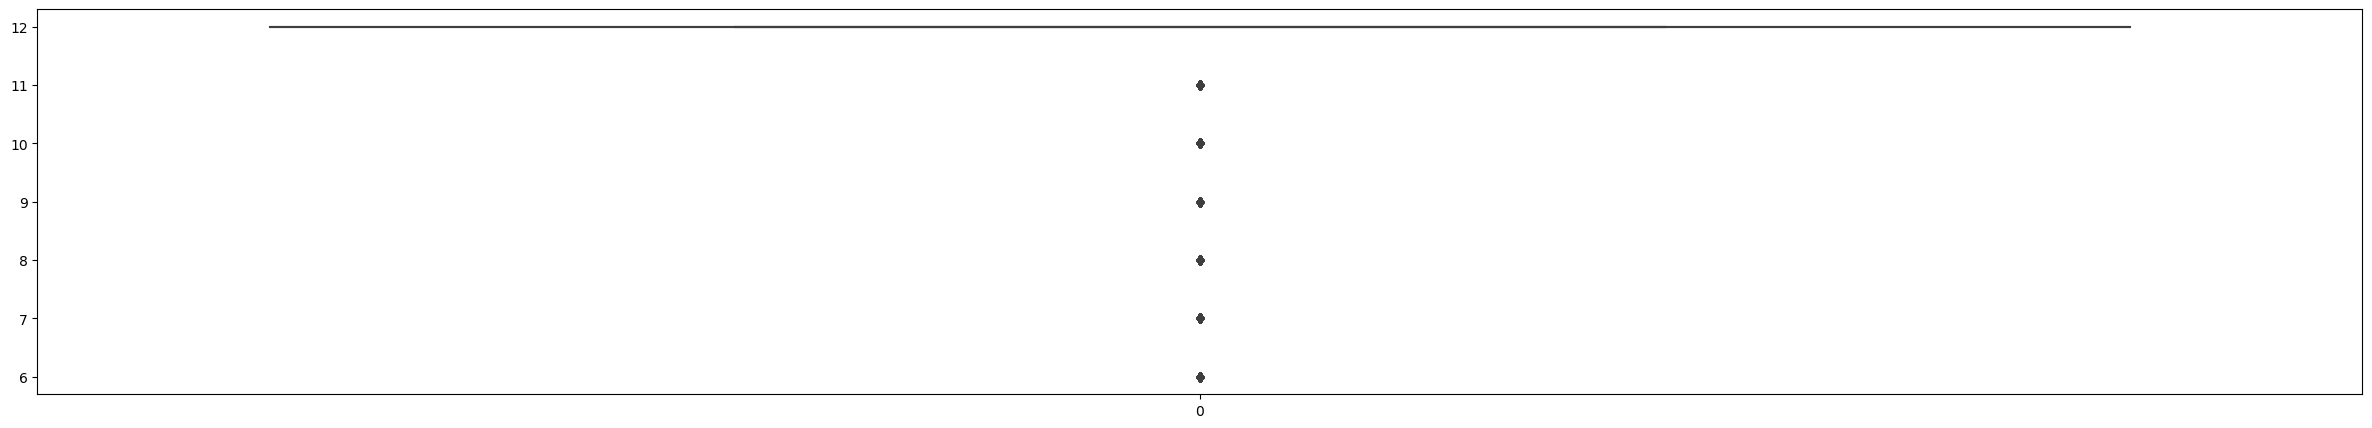

In [7]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.boxplot(df[column])
    plt.show()

In [8]:
#imputing with median values using sklearn.impute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X) 

df['MINIMUM_PAYMENTS_NEW'] = X
X2 = df['CREDIT_LIMIT'].values.reshape(-1,1)
X2 = imputer.fit_transform(X2) 
df['CREDIT_LIMIT_NEW'] = X2
df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Function to handle missing values
def missing_value_treatment(df):
    df = df.copy()
    missing_columns = df.columns[df.isna().any()].tolist()
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_cols = list(set(df.columns) - set(numerical_cols))
    
    for col in missing_columns:
        missing_ratio = df[col].isna().sum() / len(df)
        if missing_ratio <= 0.05 and len(df) > 30000:
            df.dropna(subset=[col], inplace=True)
        elif missing_ratio > 0.8:
            df.drop(columns=[col], inplace=True)
        else:
            if col in categorical_cols:
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
            else:
                imputer = IterativeImputer(max_iter=10, random_state=0)
                imputed_data = imputer.fit_transform(df[numerical_cols])
                df[numerical_cols] = pd.DataFrame(imputed_data, columns=numerical_cols)

    df.reset_index(drop=True, inplace=True)
    print("Missing values treated successfully.")
    return df

# Function to handle duplicate values
def duplicate_value_treatment(df):
    df = df.copy()
    initial_count = len(df)
    df.drop_duplicates(inplace=True)
    final_count = len(df)
    df.reset_index(drop=True, inplace=True)
    print(f"Duplicate values removed: {initial_count - final_count}")
    return df

# Function to standardize numerical columns
def data_standardization(df, scaling_type=1):
    df = df.copy()
    num_var = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
    
    if scaling_type == 1:
        scaler = StandardScaler()
    elif scaling_type == 2:
        scaler = MinMaxScaler()
    else:
        print("Invalid scaling type. Choose 1 (StandardScaler) or 2 (MinMaxScaler).")
        return df
    
    for col in num_var:
        df[col] = scaler.fit_transform(df[[col]]).round(2)
    
    print(f"Data standardized using {'StandardScaler' if scaling_type == 1 else 'MinMaxScaler'}.")
    return df

# Function to encode categorical columns
def cat_encoding(df):
    df = df.copy()
    cat_var = [col for col in df.columns if df[col].dtype in ['object', 'category']]
    label_encoder = LabelEncoder()
    
    for col in cat_var:
        df[col] = label_encoder.fit_transform(df[col].astype(str))
    
    print("Categorical variables encoded successfully.")
    return df

# Main data preprocessing pipeline
def preprocess_data(df, scaling_type=1):
    print("Starting data preprocessing...")
    df = missing_value_treatment(df)
    df = duplicate_value_treatment(df)
    df = data_standardization(df, scaling_type)
    df = cat_encoding(df)
    print("Data preprocessing completed.")
    return df

# Example Usage:
df = preprocess_data(df, scaling_type=1)


Starting data preprocessing...
Missing values treated successfully.
Duplicate values removed: 0
Data standardized using StandardScaler.
Categorical variables encoded successfully.
Data preprocessing completed.


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import pandas as pd

def data_standardization(df, scaling_type=1):
    df = df.copy()
    num_var = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    if scaling_type == 1:
        scaler = StandardScaler()
    elif scaling_type == 2:
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaling_type. Use 1 for StandardScaler or 2 for MinMaxScaler.")
    df[num_var] = scaler.fit_transform(df[num_var]).round(2)
    return df

def cat_encoding(df):
    df = df.copy()
    cat_var = [col for col in df.columns if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]
    label_encoder = LabelEncoder()
    for feature in cat_var:
        df[feature] = label_encoder.fit_transform(df[feature])
    return df

df = cat_encoding(df)
df = data_standardization(df, scaling_type=2)

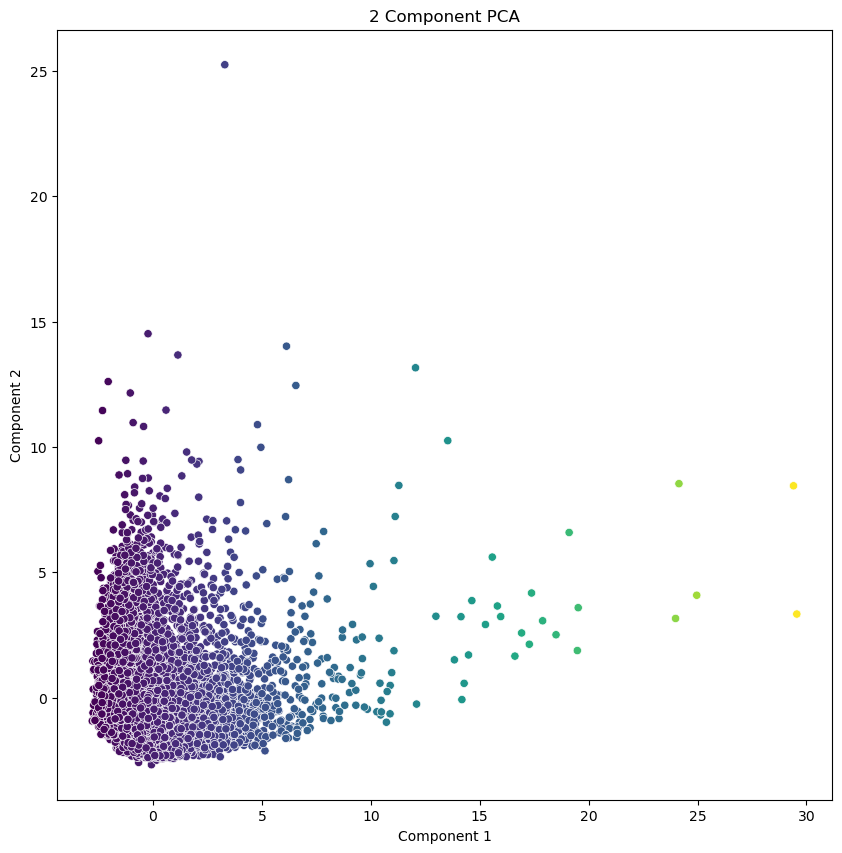

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.003s...
[t-SNE] Computed neighbors for 8950 samples in 1.011s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.501191
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.759109
[t-SNE] KL divergence after 300 iterations: 2.550860


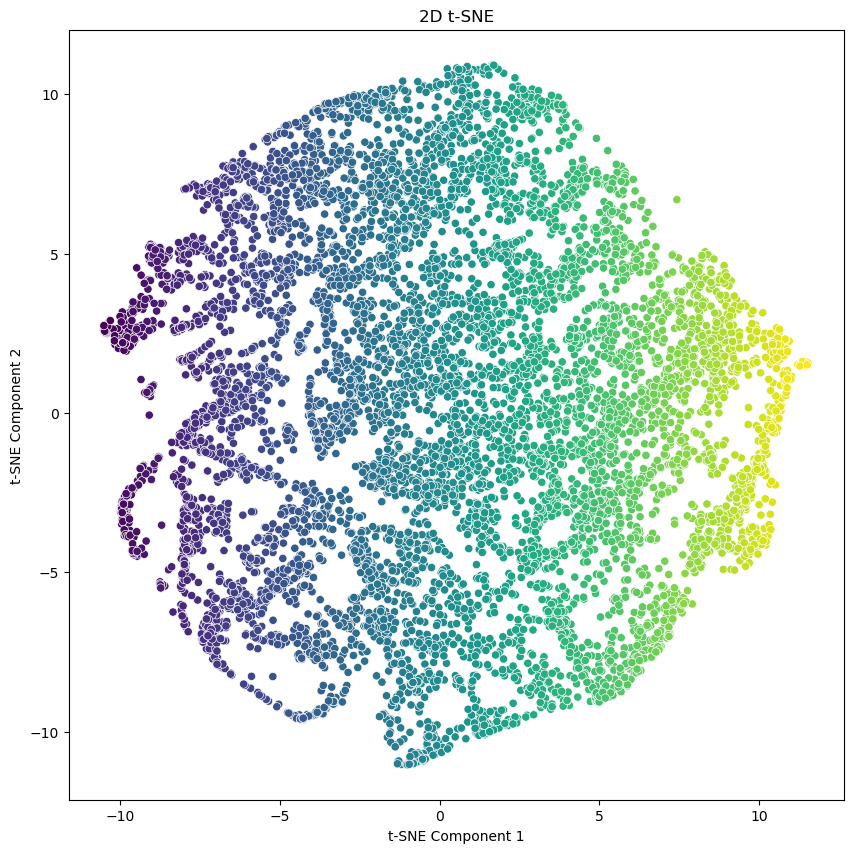

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.004s...
[t-SNE] Computed neighbors for 8950 samples in 0.870s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.501191
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.303085
[t-SNE] KL divergence after 300 iterations: 2.144780


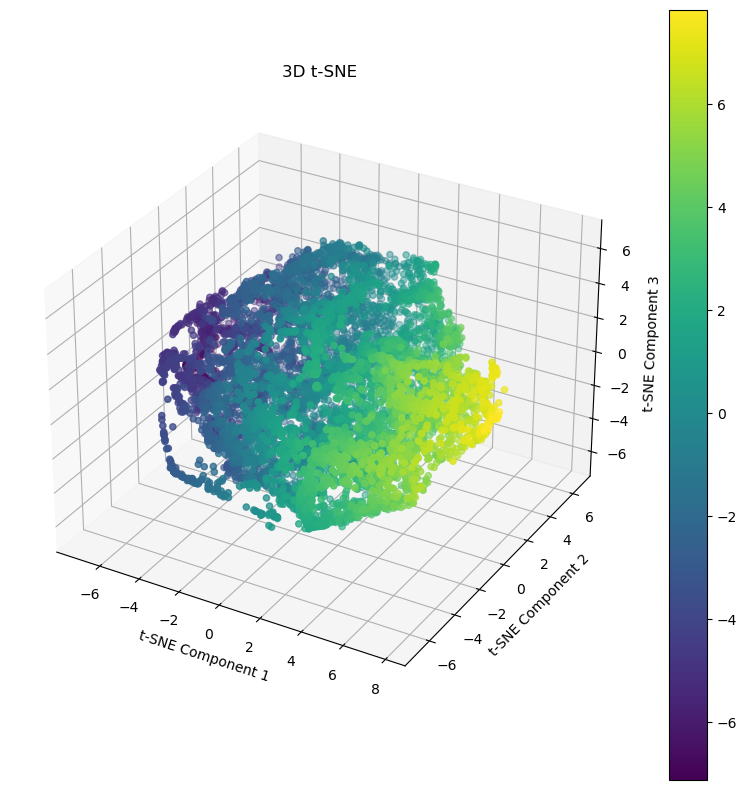

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def scale_data(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    return df_scaled

def pca_2d_visualization(df_scaled):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df_scaled)
    PCA_dataset = pd.DataFrame(data=principalComponents, columns=['component1', 'component2'])
    plt.figure(figsize=(10, 10))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('2 Component PCA')
    sns.scatterplot(x='component1', y='component2', data=PCA_dataset, palette='viridis', hue='component1', legend=False)
    plt.show()

def tsne_2d_visualization(df_scaled, perplexity=40, n_iter=300):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=n_iter)
    tsne_results = tsne.fit_transform(df_scaled)
    TSNE_dataset = pd.DataFrame(data=tsne_results, columns=['tsne_component1', 'tsne_component2'])
    plt.figure(figsize=(10, 10))
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('2D t-SNE')
    sns.scatterplot(x='tsne_component1', y='tsne_component2', data=TSNE_dataset, palette='viridis', hue='tsne_component1', legend=False)
    plt.show()

def tsne_3d_visualization(df_scaled, perplexity=40, n_iter=300):
    tsne = TSNE(n_components=3, verbose=1, perplexity=perplexity, n_iter=n_iter)
    tsne_results = tsne.fit_transform(df_scaled)
    TSNE_dataset = pd.DataFrame(data=tsne_results, columns=['tsne_component1', 'tsne_component2', 'tsne_component3'])
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    plt.title('3D t-SNE')
    scatter = ax.scatter(xs=TSNE_dataset['tsne_component1'], 
                         ys=TSNE_dataset['tsne_component2'], 
                         zs=TSNE_dataset['tsne_component3'], 
                         c=TSNE_dataset['tsne_component1'], 
                         cmap='viridis')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('t-SNE Component 3')
    plt.colorbar(scatter)
    plt.show()
df_scaled = scale_data(df)
pca_2d_visualization(df_scaled)
tsne_2d_visualization(df_scaled)
tsne_3d_visualization(df_scaled)



Applying DBSCAN with eps=0.014 and min_samples=100
Unique Cluster Labels (including noise): [-1  0  1  2]
-1    7210
 2    1216
 0     283
 1     241
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 3
Silhouette Score: -0.2489
Davies-Bouldin Index: 0.8865
Calinski-Harabasz Index: 827.3767


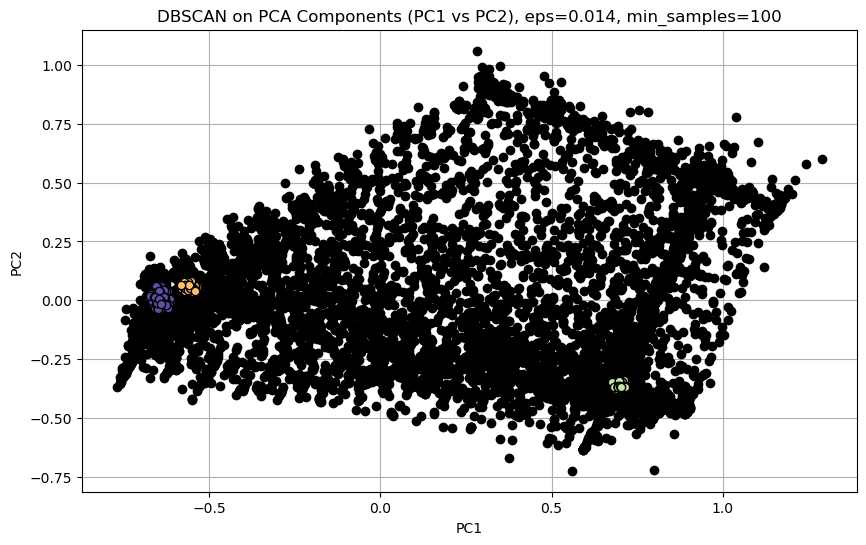


Applying DBSCAN with eps=0.014 and min_samples=200
Unique Cluster Labels (including noise): [-1  0]
-1    7916
 0    1034
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 1
Not enough clusters to calculate metrics.


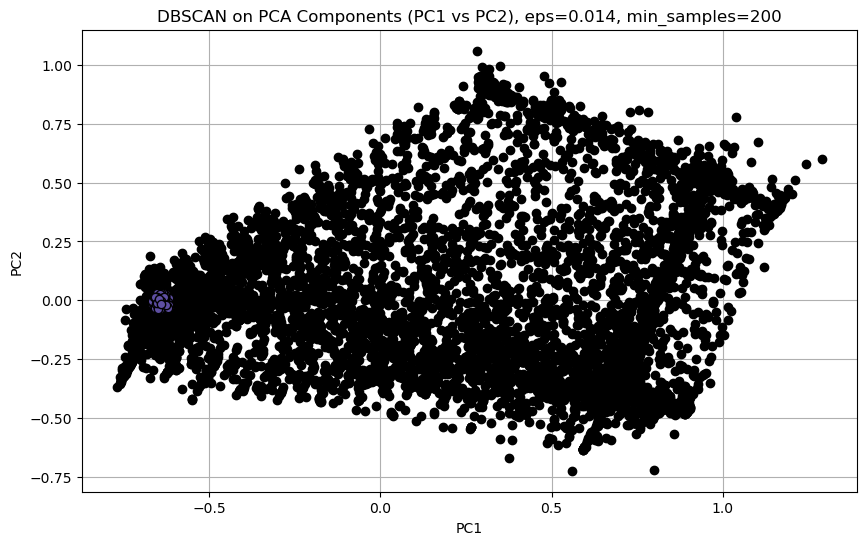


Applying DBSCAN with eps=0.014 and min_samples=300
Unique Cluster Labels (including noise): [-1  0]
-1    8044
 0     906
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 1
Not enough clusters to calculate metrics.


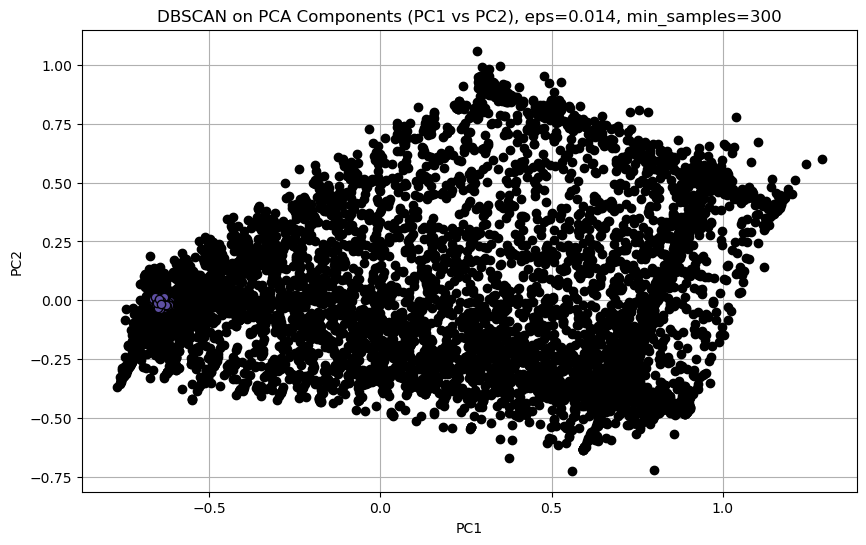


Applying DBSCAN with eps=0.014 and min_samples=400
Unique Cluster Labels (including noise): [-1  0]
-1    8182
 0     768
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 1
Not enough clusters to calculate metrics.


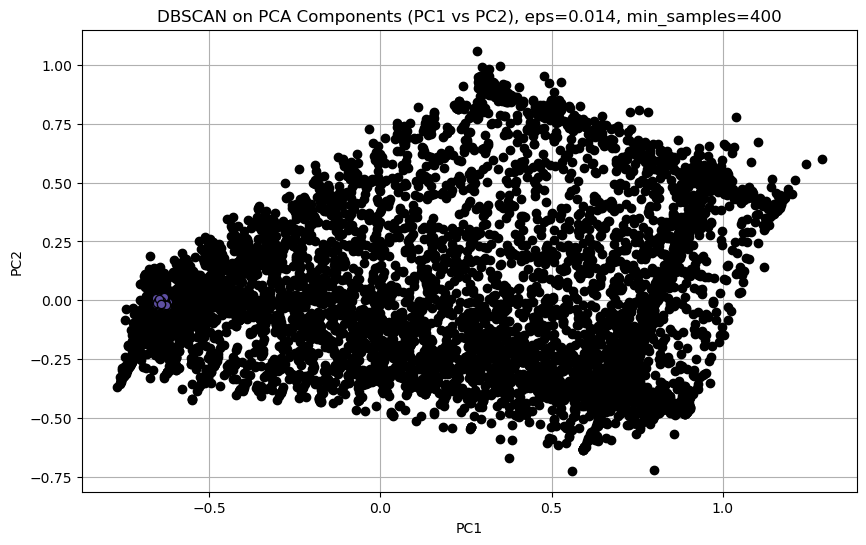


Applying DBSCAN with eps=0.014 and min_samples=500
Unique Cluster Labels (including noise): [-1  0]
-1    8281
 0     669
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 1
Not enough clusters to calculate metrics.


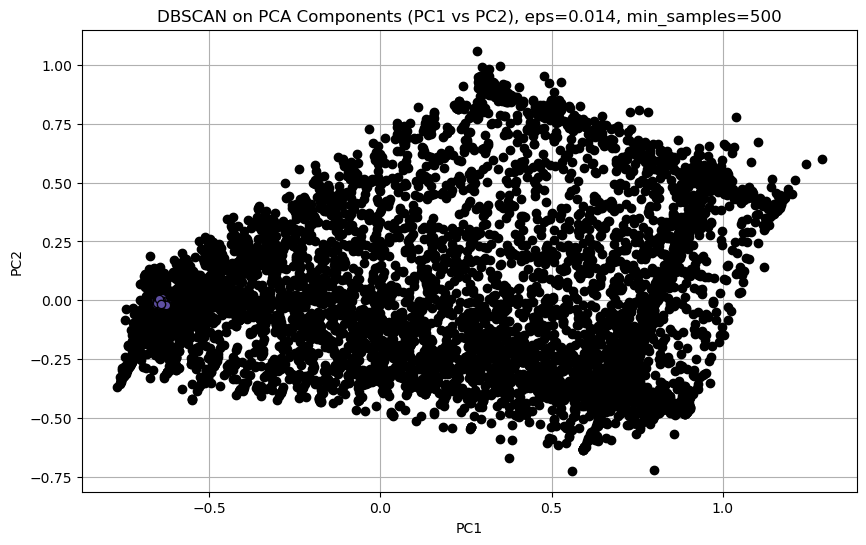


Applying DBSCAN with eps=0.06 and min_samples=100
Unique Cluster Labels (including noise): [-1  0  1  2]
-1    4306
 0    3350
 1    1229
 2      65
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 3
Silhouette Score: 0.2458
Davies-Bouldin Index: 0.9414
Calinski-Harabasz Index: 4698.2790


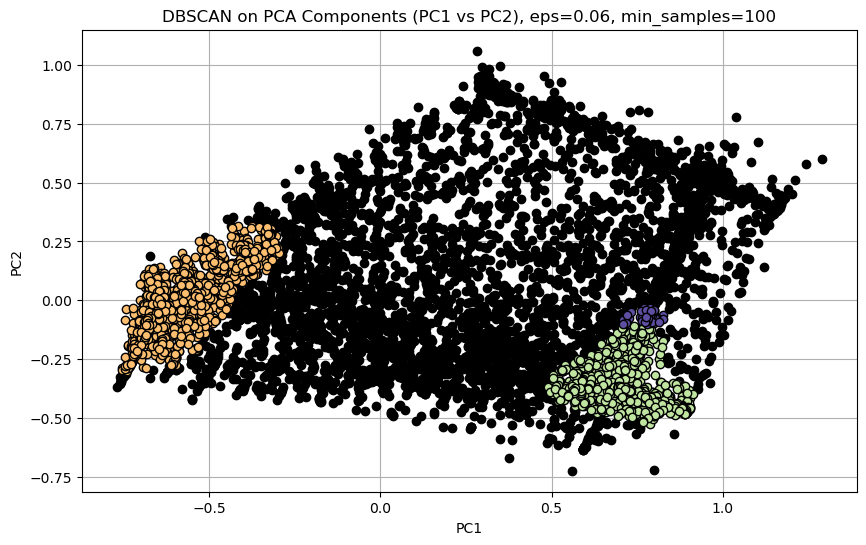


Applying DBSCAN with eps=0.06 and min_samples=200
Unique Cluster Labels (including noise): [-1  0  1]
-1    5327
 0    2886
 1     737
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.1879
Davies-Bouldin Index: 0.9068
Calinski-Harabasz Index: 4458.8544


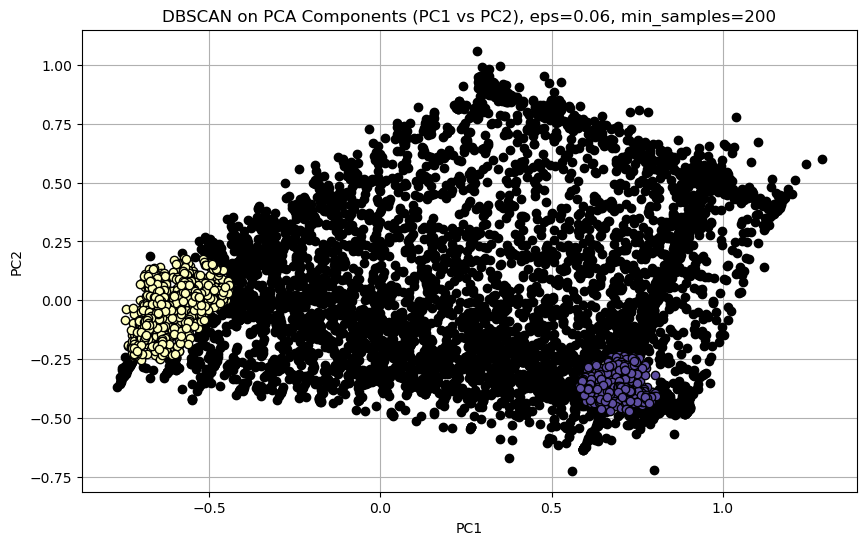


Applying DBSCAN with eps=0.06 and min_samples=300
Unique Cluster Labels (including noise): [-1  0  1]
-1    5498
 0    2796
 1     656
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.1566
Davies-Bouldin Index: 0.9021
Calinski-Harabasz Index: 4045.5264


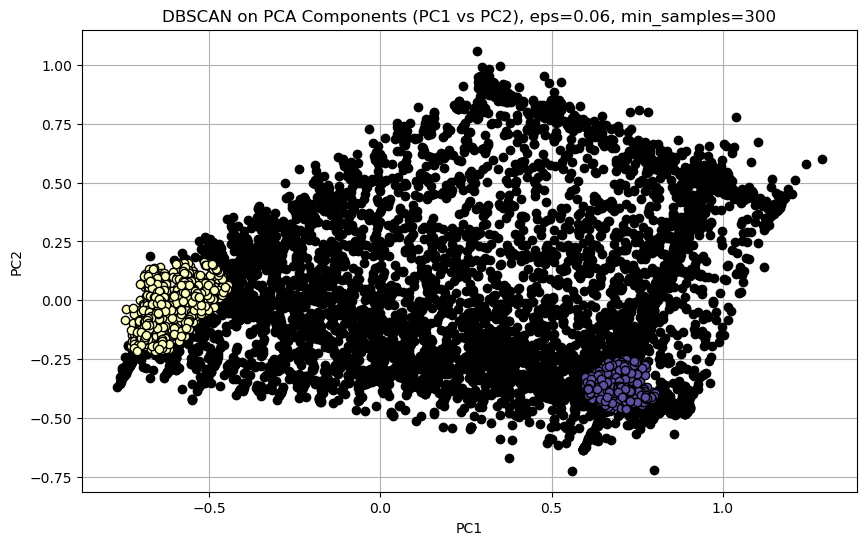


Applying DBSCAN with eps=0.06 and min_samples=400
Unique Cluster Labels (including noise): [-1  0  1]
-1    5930
 0    2597
 1     423
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.0715
Davies-Bouldin Index: 0.9062
Calinski-Harabasz Index: 3181.3573


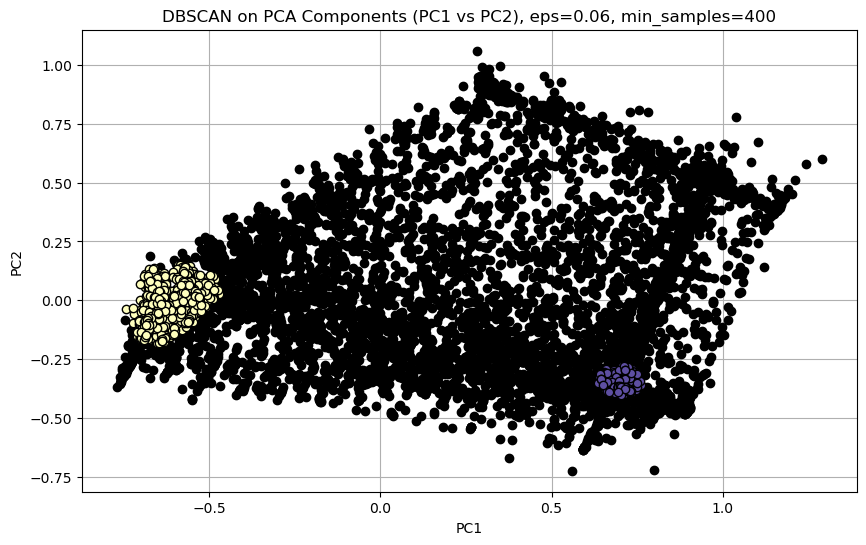


Applying DBSCAN with eps=0.06 and min_samples=500
Unique Cluster Labels (including noise): [-1  0]
-1    6624
 0    2326
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 1
Not enough clusters to calculate metrics.


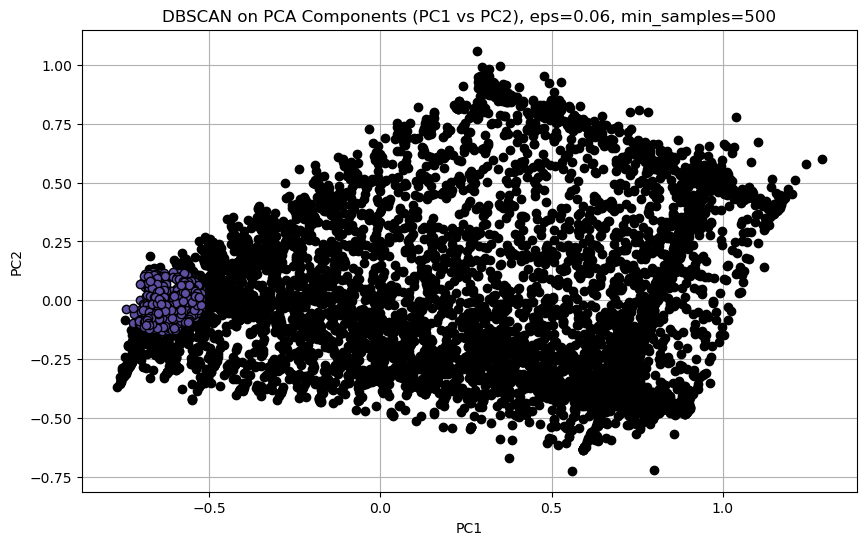


Applying DBSCAN with eps=0.075 and min_samples=100
Unique Cluster Labels (including noise): [-1  0  1  2  3  4  5]
 0    3860
-1    2537
 1    1835
 2     370
 3     145
 4     127
 5      76
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 6
Silhouette Score: 0.2565
Davies-Bouldin Index: 1.0504
Calinski-Harabasz Index: 4152.7155


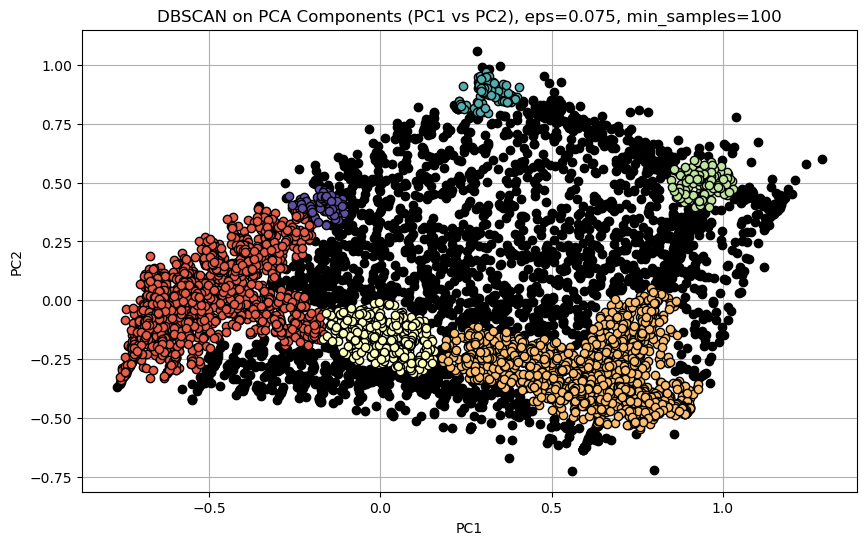


Applying DBSCAN with eps=0.075 and min_samples=200
Unique Cluster Labels (including noise): [-1  0  1]
-1    4562
 0    3277
 1    1111
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.3190
Davies-Bouldin Index: 0.8912
Calinski-Harabasz Index: 6603.1131


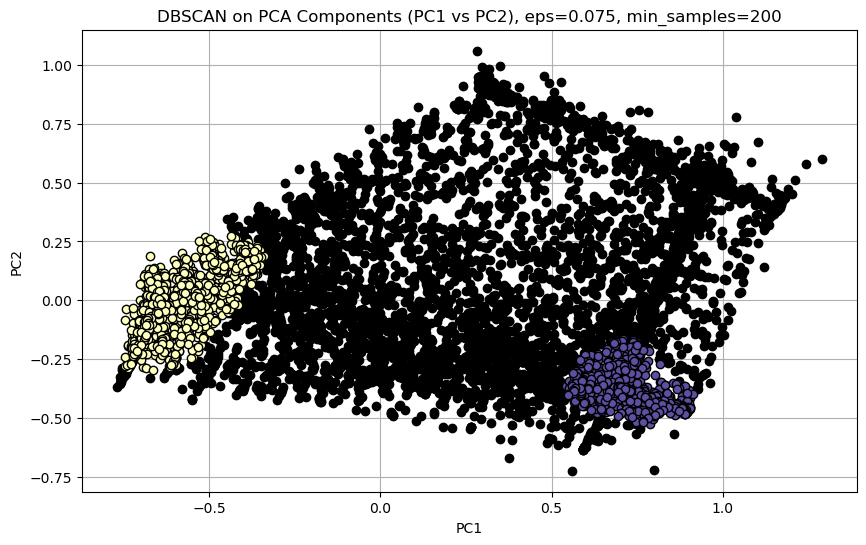


Applying DBSCAN with eps=0.075 and min_samples=300
Unique Cluster Labels (including noise): [-1  0  1]
-1    5079
 0    2995
 1     876
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.2311
Davies-Bouldin Index: 0.9102
Calinski-Harabasz Index: 5001.8221


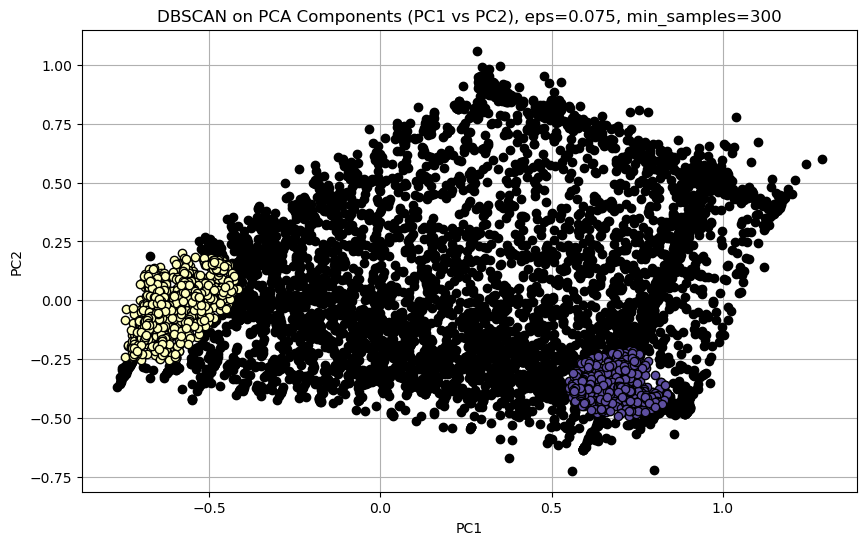


Applying DBSCAN with eps=0.075 and min_samples=400
Unique Cluster Labels (including noise): [-1  0  1]
-1    5177
 0    2949
 1     824
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.2130
Davies-Bouldin Index: 0.9117
Calinski-Harabasz Index: 4731.2382


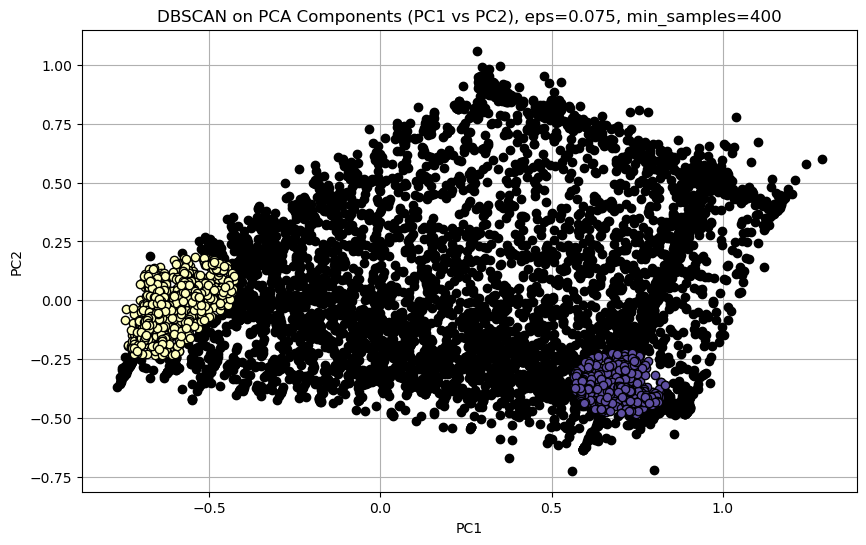


Applying DBSCAN with eps=0.075 and min_samples=500
Unique Cluster Labels (including noise): [-1  0]
-1    6111
 0    2839
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 1
Not enough clusters to calculate metrics.


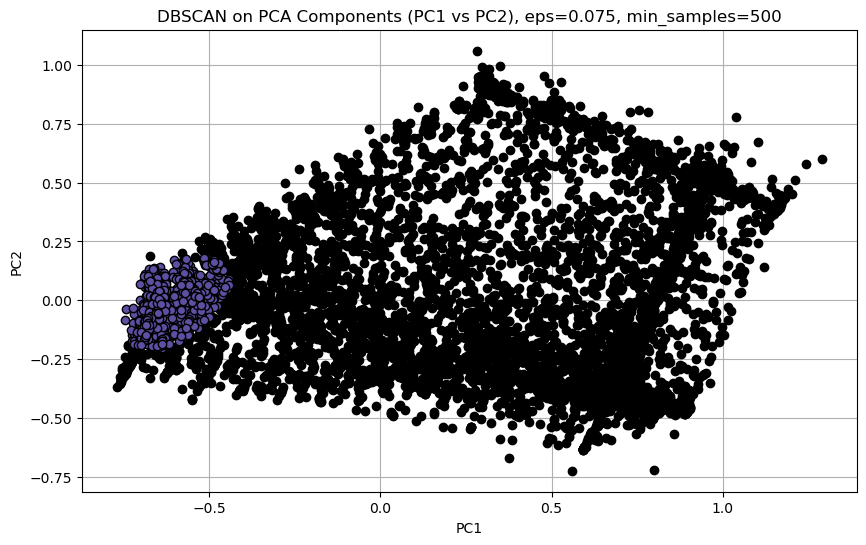


Applying DBSCAN with eps=0.05 and min_samples=100
Unique Cluster Labels (including noise): [-1  0  1]
-1    4741
 0    3172
 1    1037
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.2871
Davies-Bouldin Index: 0.8972
Calinski-Harabasz Index: 5959.1789


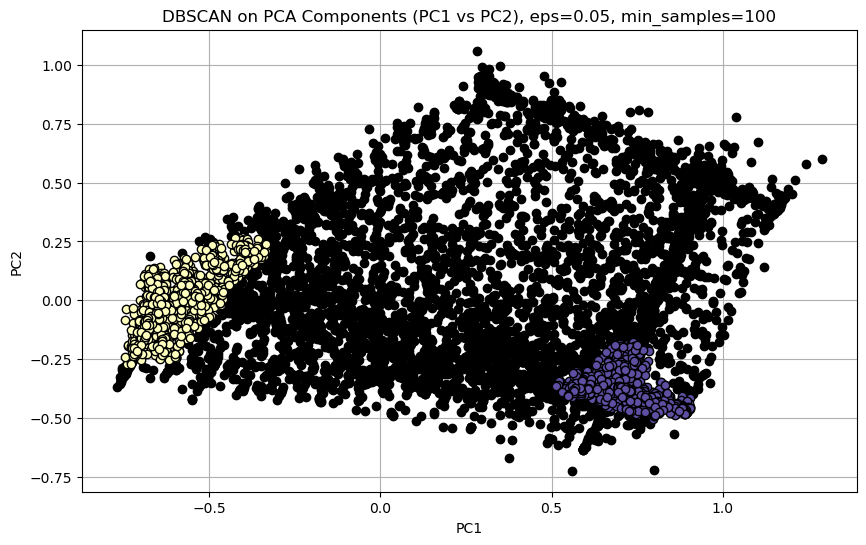


Applying DBSCAN with eps=0.05 and min_samples=200
Unique Cluster Labels (including noise): [-1  0  1]
-1    5672
 0    2677
 1     601
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.1252
Davies-Bouldin Index: 0.8983
Calinski-Harabasz Index: 3677.9544


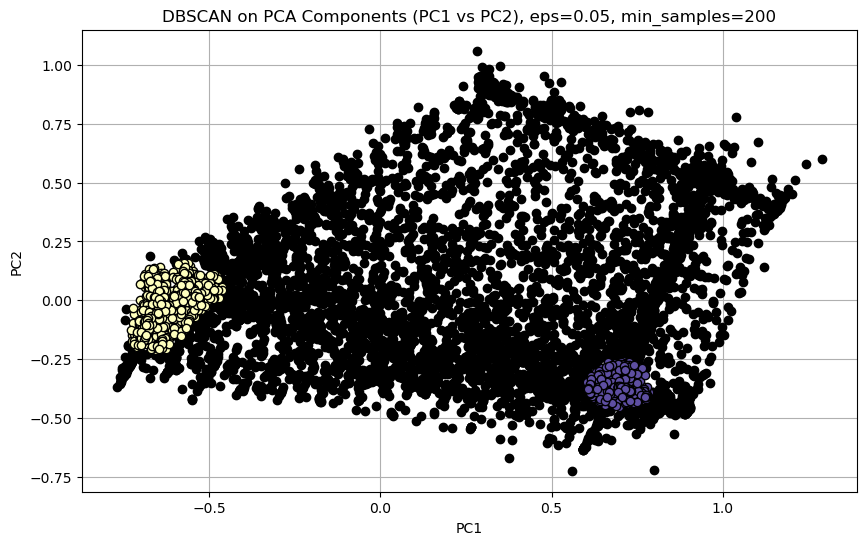


Applying DBSCAN with eps=0.05 and min_samples=300
Unique Cluster Labels (including noise): [-1  0  1]
-1    5985
 0    2435
 1     530
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.0616
Davies-Bouldin Index: 0.9003
Calinski-Harabasz Index: 2940.5329


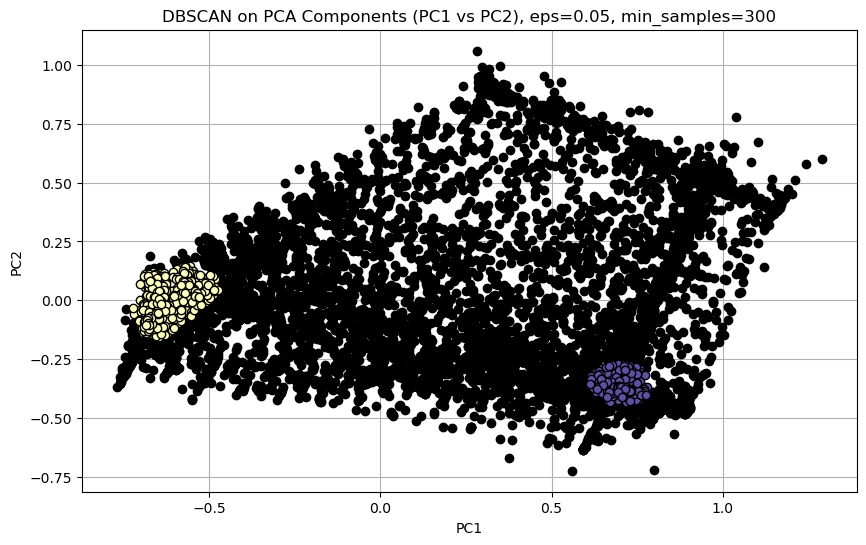


Applying DBSCAN with eps=0.05 and min_samples=400
Unique Cluster Labels (including noise): [-1  0]
-1    6770
 0    2180
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 1
Not enough clusters to calculate metrics.


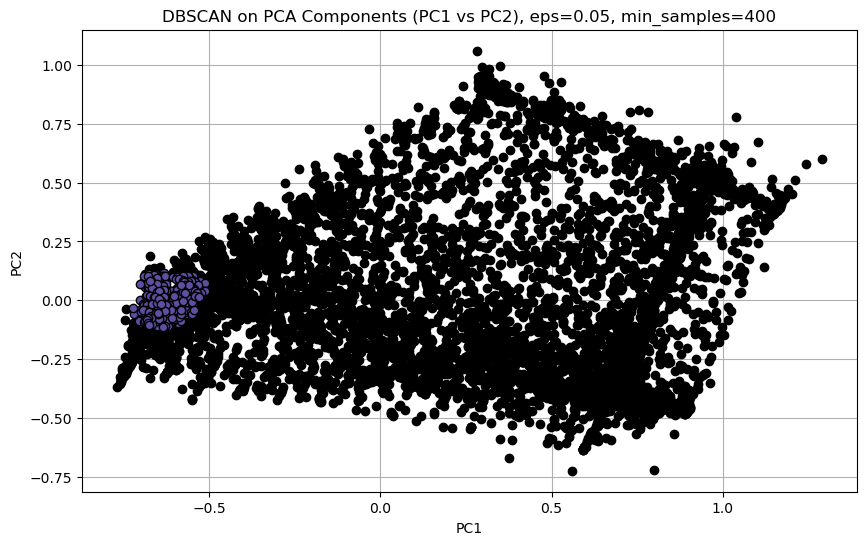


Applying DBSCAN with eps=0.05 and min_samples=500
Unique Cluster Labels (including noise): [-1  0]
-1    7009
 0    1941
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 1
Not enough clusters to calculate metrics.


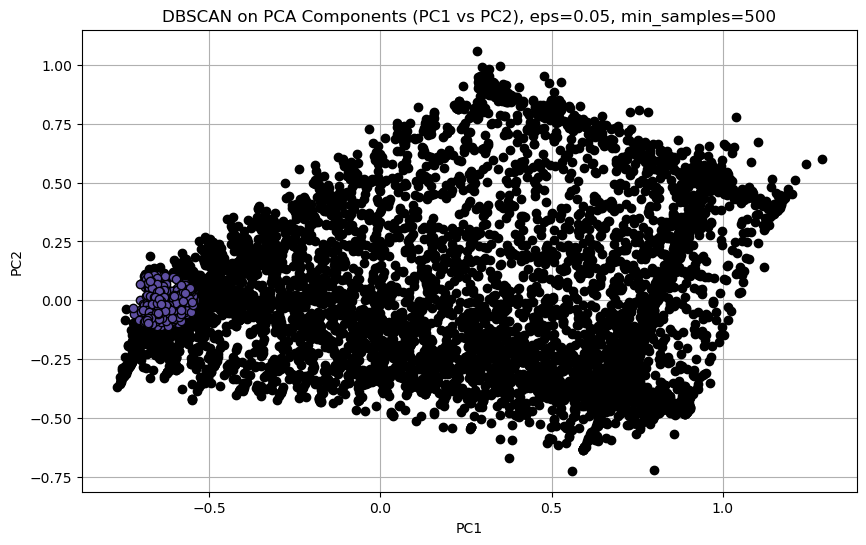

In [29]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to apply PCA on dataset
def pca_selection(df):
    """
    Applies PCA on the dataset after encoding categorical features.
    Args:
        df (DataFrame): Input dataset.
    Returns:
        DataFrame: Transformed dataset with PCA components.
    """
    # Ensure all categorical columns are encoded
    cat_var = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']
    if cat_var:
        label_encoder = LabelEncoder()
        for feature in cat_var:
            df[feature] = label_encoder.fit_transform(df[feature])

    # Apply PCA
    pca = PCA(random_state=123)
    pca_result = pca.fit_transform(df)

    # Create a DataFrame for PCA components
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

    return pca_df

# Function to apply DBSCAN and calculate evaluation metrics
def apply_dbscan_on_pca(pca_df, eps_value, min_samples_value, pc1='PC1', pc2='PC2'):
    """
    Applies DBSCAN on PCA components and evaluates clustering performance.
    Args:
        pca_df (DataFrame): PCA-transformed dataset.
        eps_value (float): DBSCAN epsilon value.
        min_samples_value (int): DBSCAN minimum samples value.
        pc1 (str): First principal component for visualization.
        pc2 (str): Second principal component for visualization.
    """
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
    clusters = dbscan.fit_predict(pca_df[[pc1, pc2]])

    # Add the cluster labels to the PCA DataFrame
    pca_df['Cluster'] = clusters

    # Identify unique clusters (excluding noise -1)
    unique_clusters = np.unique(clusters)
    n_clusters = len(unique_clusters[unique_clusters != -1])  # Exclude noise
    cluster_counts = pca_df['Cluster'].value_counts()

    print(f"Unique Cluster Labels (including noise): {unique_clusters}")
    print(cluster_counts)
    print(f"Number of Clusters (excluding noise): {n_clusters}")

    # Evaluation metrics
    if n_clusters > 1:
        # Silhouette Score
        silhouette_avg = silhouette_score(pca_df[[pc1, pc2]], clusters)
        print(f"Silhouette Score: {silhouette_avg:.4f}")

        # Davies-Bouldin Index
        db_index = davies_bouldin_score(pca_df[[pc1, pc2]], clusters)
        print(f"Davies-Bouldin Index: {db_index:.4f}")

        # Calinski-Harabasz Index (Variance Ratio Criterion)
        ch_index = calinski_harabasz_score(pca_df[[pc1, pc2]], clusters)
        print(f"Calinski-Harabasz Index: {ch_index:.4f}")
    else:
        print("Not enough clusters to calculate metrics.")

    # Visualize the clusters on the first two principal components
    plt.figure(figsize=(10, 6))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_clusters))]

    for k, col in zip(unique_clusters, colors):
        if k == -1:
            # Noise points plotted in black
            col = [0, 0, 0, 1]

        class_member_mask = (clusters == k)
        xy = pca_df[class_member_mask]
        plt.plot(xy[pc1], xy[pc2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title(f'DBSCAN on PCA Components ({pc1} vs {pc2}), eps={eps_value}, min_samples={min_samples_value}')
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.grid(True)
    plt.show()

# Function to experiment with DBSCAN parameters
def experiment_with_dbscan(pca_df, eps_values, min_samples_values):
    """
    Runs DBSCAN with different parameter combinations and evaluates results.
    Args:
        pca_df (DataFrame): PCA-transformed dataset.
        eps_values (list): List of epsilon values for DBSCAN.
        min_samples_values (list): List of min_samples values for DBSCAN.
    """
    for eps in eps_values:
        for min_samples in min_samples_values:
            print(f"\nApplying DBSCAN with eps={eps} and min_samples={min_samples}")
            apply_dbscan_on_pca(pca_df, eps_value=eps, min_samples_value=min_samples)

# Apply PCA
pca_df = pca_selection(df)

# Define parameter ranges
eps_values = [0.014,0.06,0.075,0.05]
min_samples_values = [100,200,300,400,500 ]

# Run DBSCAN experiments
experiment_with_dbscan(pca_df, eps_values, min_samples_values)


# EFFECT OF EPS and Min pts

Effect of Increasing Epsilon (eps):

Noise decreases: Fewer points classified as noise (-1).
Number of clusters increases: Larger neighborhood means more points grouped together.
Silhouette Score decreases: More clusters, but they might not be well-separated.
Davies-Bouldin Index increases: Clusters become less compact and more overlapping.

Effect of Decreasing Epsilon (eps):

Noise increases: More points classified as noise (-1).
Number of clusters decreases: Fewer points grouped together in clusters.
Silhouette Score increases: Clusters become more compact.
Davies-Bouldin Index decreases: Clusters become more distinct and well-separated.

Effect of Increasing Minimum Samples (min_samples):
Number of clusters decreases: Requires more points to form a cluster.
Noise increases: More points are classified as noise (-1).
Silhouette Score increases: Clusters become denser and more compact.
Cluster quality improves: Tighter clusters, but fewer clusters overall.

Effect of Decreasing Minimum Samples (min_samples):
Number of clusters increases: Fewer points required to form a cluster.
Noise decreases: Fewer points classified as noise.
Silhouette Score may decrease: Clusters might become less compact.
Clusters might be less distinct: More clusters, but potentially less meaningful.


Applying DBSCAN with eps=0.07 and min_samples=200
Unique Cluster Labels (including noise): [-1  0  1]
-1    4739
 0    3197
 1    1014
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.2919
Davies-Bouldin Index: 0.8877
Calinski-Harabasz Index: 6052.7406


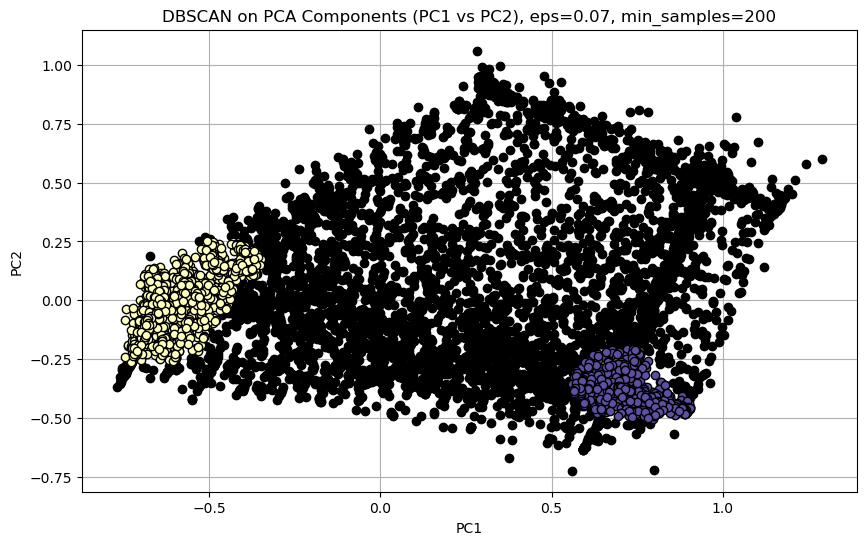

In [30]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to apply PCA on dataset
def pca_selection(df):
    """
    Applies PCA on the dataset after encoding categorical features.
    Args:
        df (DataFrame): Input dataset.
    Returns:
        DataFrame: Transformed dataset with PCA components.
    """
    # Ensure all categorical columns are encoded
    cat_var = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']
    if cat_var:
        label_encoder = LabelEncoder()
        for feature in cat_var:
            df[feature] = label_encoder.fit_transform(df[feature])

    # Apply PCA
    pca = PCA(random_state=123)
    pca_result = pca.fit_transform(df)

    # Create a DataFrame for PCA components
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

    return pca_df

# Function to apply DBSCAN and calculate evaluation metrics
def apply_dbscan_on_pca(pca_df, eps_value, min_samples_value, pc1='PC1', pc2='PC2'):
    """
    Applies DBSCAN on PCA components and evaluates clustering performance.
    Args:
        pca_df (DataFrame): PCA-transformed dataset.
        eps_value (float): DBSCAN epsilon value.
        min_samples_value (int): DBSCAN minimum samples value.
        pc1 (str): First principal component for visualization.
        pc2 (str): Second principal component for visualization.
    """
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
    clusters = dbscan.fit_predict(pca_df[[pc1, pc2]])

    # Add the cluster labels to the PCA DataFrame
    pca_df['Cluster'] = clusters

    # Identify unique clusters (excluding noise -1)
    unique_clusters = np.unique(clusters)
    n_clusters = len(unique_clusters[unique_clusters != -1])  # Exclude noise
    cluster_counts = pca_df['Cluster'].value_counts()

    print(f"Unique Cluster Labels (including noise): {unique_clusters}")
    print(cluster_counts)
    print(f"Number of Clusters (excluding noise): {n_clusters}")

    # Evaluation metrics
    if n_clusters > 1:
        # Silhouette Score
        silhouette_avg = silhouette_score(pca_df[[pc1, pc2]], clusters)
        print(f"Silhouette Score: {silhouette_avg:.4f}")

        # Davies-Bouldin Index
        db_index = davies_bouldin_score(pca_df[[pc1, pc2]], clusters)
        print(f"Davies-Bouldin Index: {db_index:.4f}")

        # Calinski-Harabasz Index (Variance Ratio Criterion)
        ch_index = calinski_harabasz_score(pca_df[[pc1, pc2]], clusters)
        print(f"Calinski-Harabasz Index: {ch_index:.4f}")
    else:
        print("Not enough clusters to calculate metrics.")

    # Visualize the clusters on the first two principal components
    plt.figure(figsize=(10, 6))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_clusters))]

    for k, col in zip(unique_clusters, colors):
        if k == -1:
            # Noise points plotted in black
            col = [0, 0, 0, 1]

        class_member_mask = (clusters == k)
        xy = pca_df[class_member_mask]
        plt.plot(xy[pc1], xy[pc2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title(f'DBSCAN on PCA Components ({pc1} vs {pc2}), eps={eps_value}, min_samples={min_samples_value}')
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.grid(True)
    plt.show()

# Function to experiment with DBSCAN parameters
def experiment_with_dbscan(pca_df, eps_values, min_samples_values):
    """
    Runs DBSCAN with different parameter combinations and evaluates results.
    Args:
        pca_df (DataFrame): PCA-transformed dataset.
        eps_values (list): List of epsilon values for DBSCAN.
        min_samples_values (list): List of min_samples values for DBSCAN.
    """
    for eps in eps_values:
        for min_samples in min_samples_values:
            print(f"\nApplying DBSCAN with eps={eps} and min_samples={min_samples}")
            apply_dbscan_on_pca(pca_df, eps_value=eps, min_samples_value=min_samples)

# Apply PCA
pca_df = pca_selection(df)

# Define parameter ranges
eps_values = [0.07]
min_samples_values = [200]

# Run DBSCAN experiments
experiment_with_dbscan(pca_df, eps_values, min_samples_values)


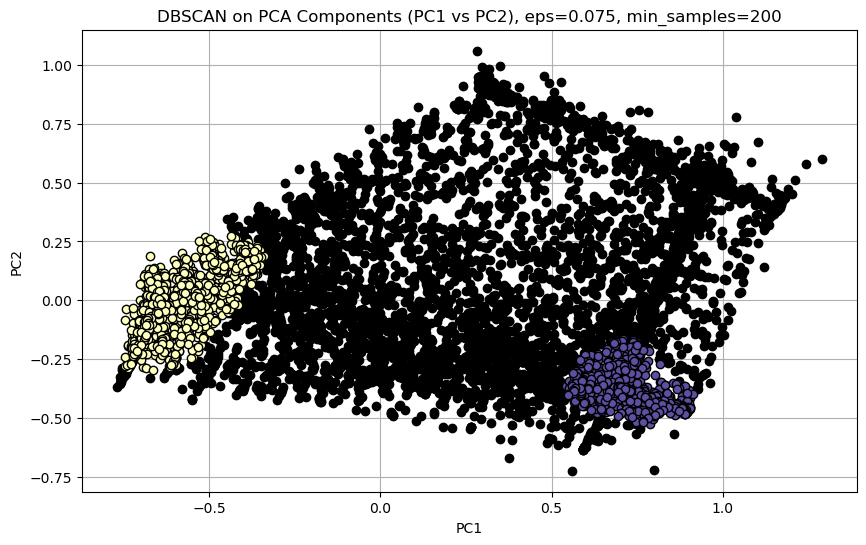

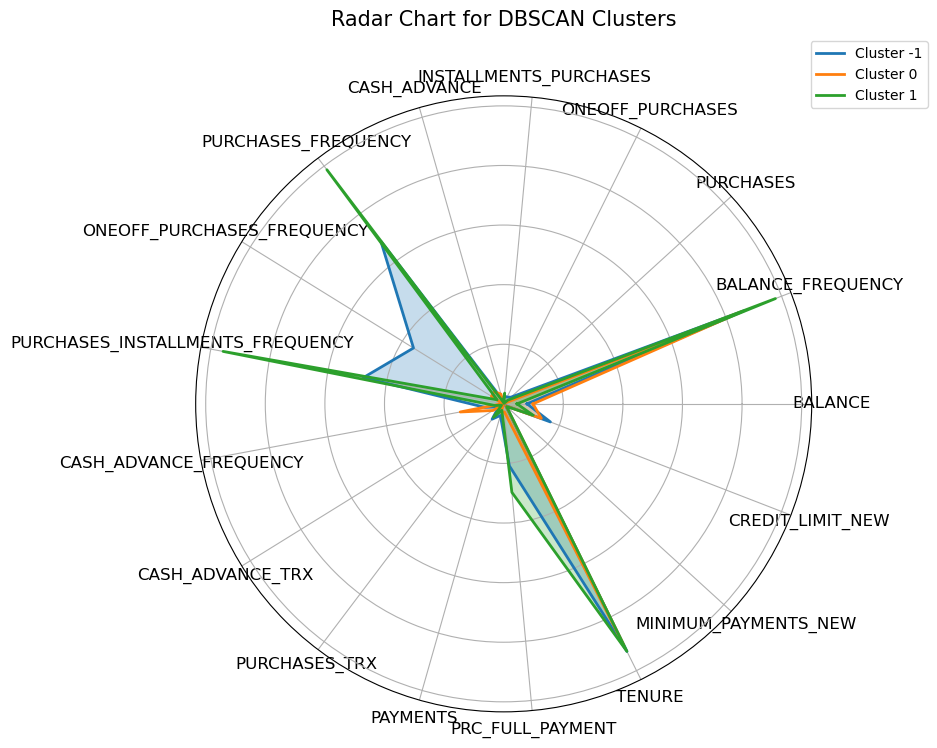

In [32]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Apply DBSCAN and calculate evaluation metrics
def apply_dbscan_on_pca(pca_df, eps_value, min_samples_value, pc1='PC1', pc2='PC2'):
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
    clusters = dbscan.fit_predict(pca_df[[pc1, pc2]])

    # Add the cluster labels to the PCA DataFrame
    pca_df['Cluster'] = clusters

    # Visualize the clusters on the first two principal components
    plt.figure(figsize=(10, 6))
    unique_clusters = np.unique(clusters)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_clusters))]

    for k, col in zip(unique_clusters, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Noise points in black
        class_member_mask = (clusters == k)
        xy = pca_df[class_member_mask]
        plt.plot(xy[pc1], xy[pc2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title(f'DBSCAN on PCA Components ({pc1} vs {pc2}), eps={eps_value}, min_samples={min_samples_value}')
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.grid(True)
    plt.show()

    # Return the cluster labels
    return clusters
df1=df.copy()
# Applying DBSCAN and adding clusters to df1
clusters = apply_dbscan_on_pca(pca_df, eps_value=0.075, min_samples_value=200)
df1['DBSCAN_Cluster'] = clusters  # Add the cluster labels as a new column in df1

# Function to create a radar chart for a given cluster type
def plot_radar_chart(df, cluster_column, title='Radar Chart'):
    # Calculate the mean of each feature by cluster
    cluster_means = df.groupby(cluster_column).mean()
    
    # Define labels (features) and number of variables
    labels = cluster_means.columns
    num_vars = len(labels)
    
    # Setup angles for radar chart (spaced equally around a circle)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # The plot needs to be a complete loop, so we repeat the first angle at the end
    angles += angles[:1]
    
    # Plotting radar chart for each cluster
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Plot each cluster
    for idx, row in cluster_means.iterrows():
        values = row.tolist()
        values += values[:1]  # Complete the loop by adding the start value at the end
        ax.plot(angles, values, label=f'Cluster {idx}', linewidth=2)
        ax.fill(angles, values, alpha=0.25)
    
    # Set up chart attributes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    
    plt.show()

# Radar chart for DBSCAN clusters
plot_radar_chart(df1, 'DBSCAN_Cluster', title='Radar Chart for DBSCAN Clusters')


# CONCLUSION OF DBSCAN RADAR PLOT
Cluster -1: This cluster might represent customers who are struggling financially. They are using cash advances frequently and have a high balance, indicating they might be relying on credit to manage their expenses.
    
Cluster 0: This cluster might represent customers with a healthy financial situation. They have a balanced credit card usage and are not overly reliant on credit.
    
Cluster 1: This cluster might represent customers who are making significant purchases, possibly for home improvement or other major expenses. They are using installment plans to manage these purchases and have a higher balance as a result.

# OPTICS CLUSTERING

Unique Cluster Labels (including noise): [-1  0  1]
-1    5079
 0    2995
 1     876
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.2311
Davies-Bouldin Index: 0.9102
Calinski-Harabasz Index: 5001.8221


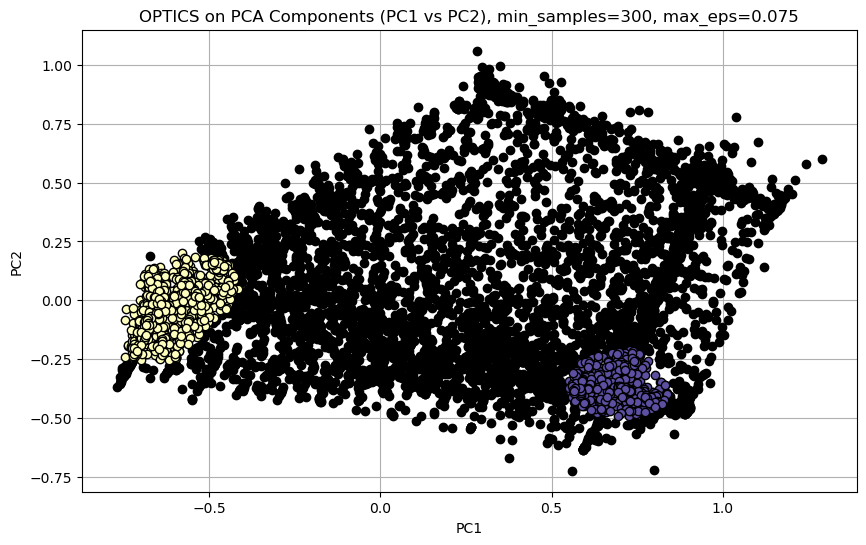

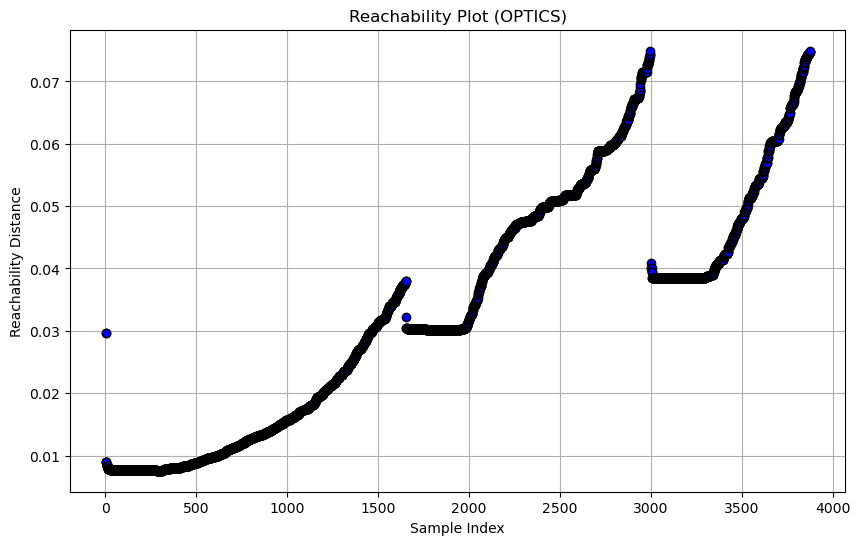

Unique Cluster Labels (including noise): [-1  0  1]
-1    4563
 0    3276
 1    1111
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 2
Silhouette Score: 0.3188
Davies-Bouldin Index: 0.8912
Calinski-Harabasz Index: 6598.9827


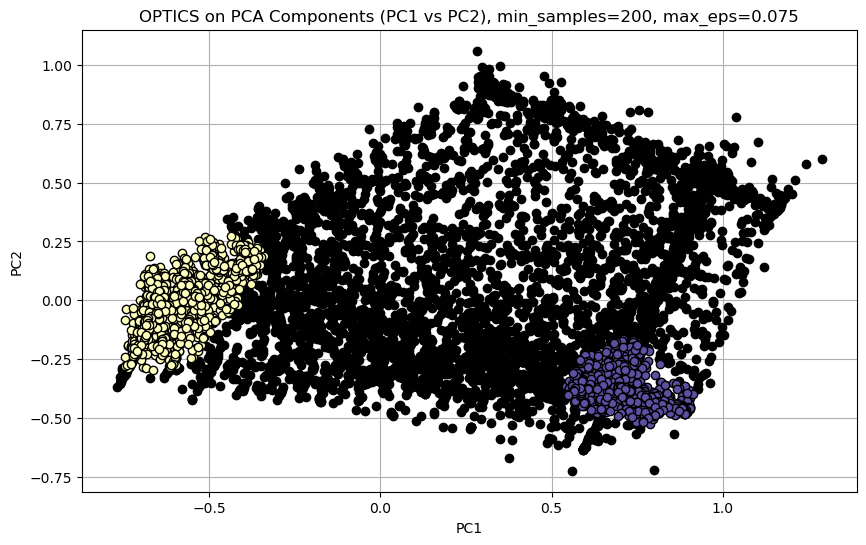

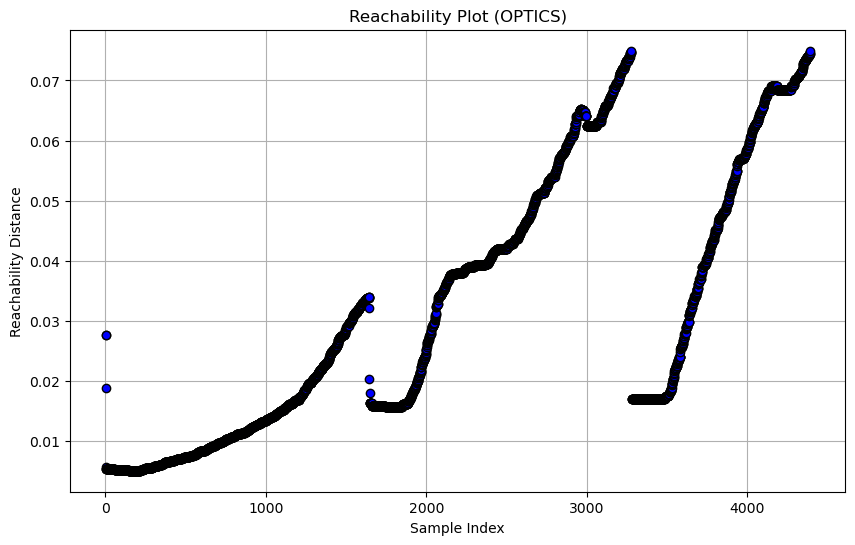

Unique Cluster Labels (including noise): [0]
0    8950
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 1
Not enough clusters to calculate metrics.


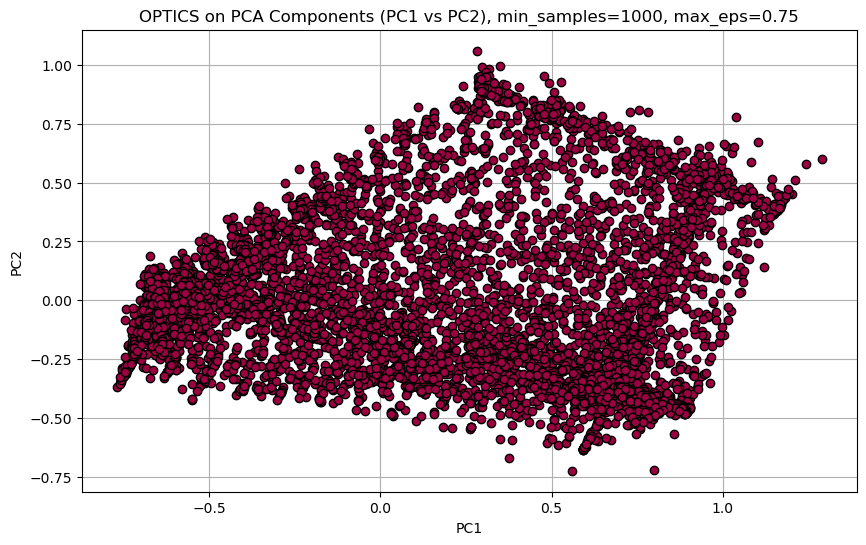

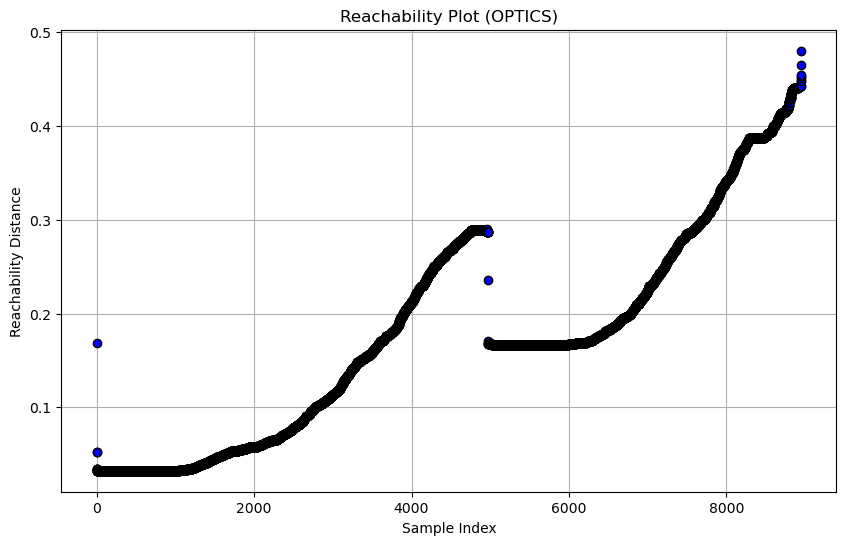

Unique Cluster Labels (including noise): [-1  0]
 0    8852
-1      98
Name: Cluster, dtype: int64
Number of Clusters (excluding noise): 1
Silhouette Score: 0.2961
Davies-Bouldin Index: 0.6117
Calinski-Harabasz Index: 337.9318


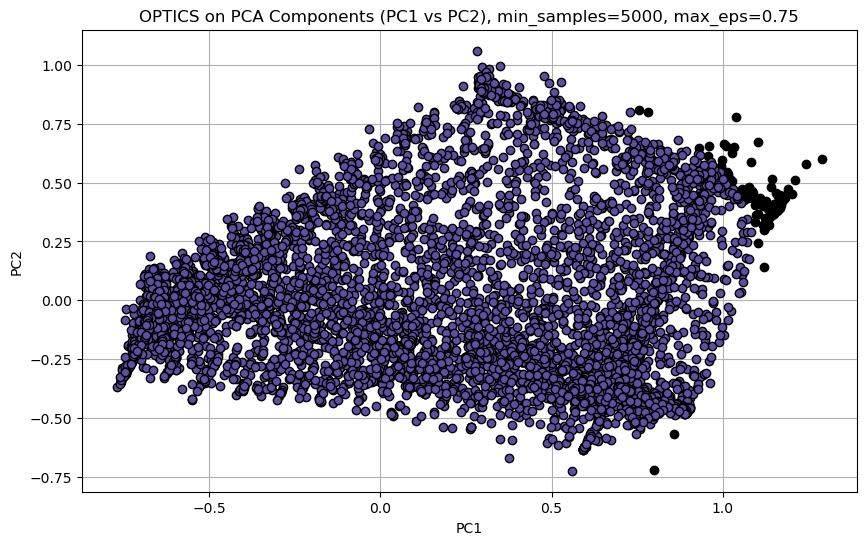

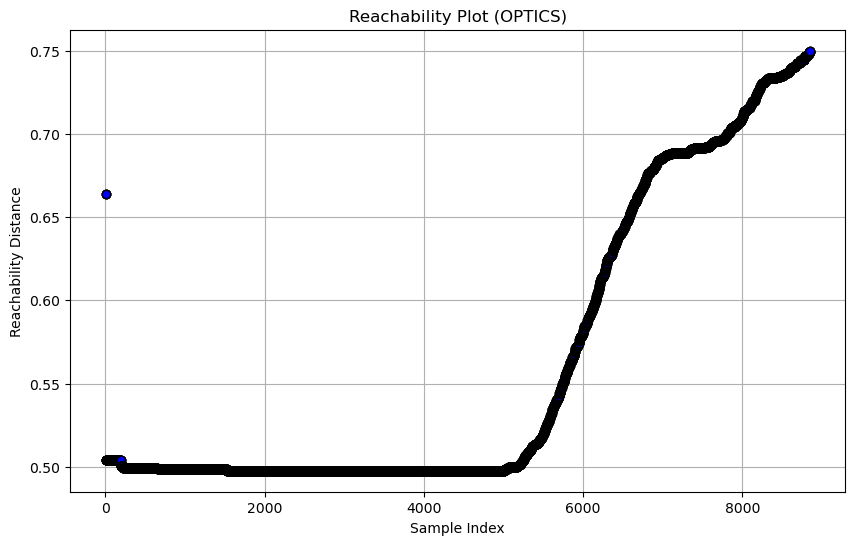

In [47]:
import numpy as np
import pandas as pd
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

def optics(pca_df, min_samples_value, max_eps_value, pc1='PC1', pc2='PC2'):
    # Apply OPTICS clustering with the given parameters
    optics = OPTICS(min_samples=min_samples_value, max_eps=max_eps_value)
    clusters = optics.fit_predict(pca_df[[pc1, pc2]])

    # Add the cluster labels to the PCA DataFrame
    pca_df['Cluster'] = clusters

    # Identify unique clusters (excluding noise -1)
    unique_clusters = np.unique(clusters)
    n_clusters = len(unique_clusters[unique_clusters != -1])  # Exclude noise
    cluster_counts = pca_df['Cluster'].value_counts()

    # Print the cluster labels and number of clusters
    print(f"Unique Cluster Labels (including noise): {unique_clusters}")
    print(cluster_counts)
    print(f"Number of Clusters (excluding noise): {n_clusters}")

    # Evaluation metrics (when there are multiple clusters and not all data points are noise)
    if len(set(clusters)) > 1 and len(set(clusters)) < len(pca_df):  
        # Silhouette Score
        silhouette_avg = silhouette_score(pca_df[[pc1, pc2]], clusters)
        print(f"Silhouette Score: {silhouette_avg:.4f}")

        # Davies-Bouldin Index
        db_index = davies_bouldin_score(pca_df[[pc1, pc2]], clusters)
        print(f"Davies-Bouldin Index: {db_index:.4f}")

        # Calinski-Harabasz Index
        ch_index = calinski_harabasz_score(pca_df[[pc1, pc2]], clusters)
        print(f"Calinski-Harabasz Index: {ch_index:.4f}")
    
    else:
        print("Not enough clusters to calculate metrics.")

    # Visualize the clusters on the first two principal components
    plt.figure(figsize=(10, 6))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_clusters))]

    for k, col in zip(unique_clusters, colors):
        if k == -1:
            # Noise points plotted in black
            col = [0, 0, 0, 1]

        class_member_mask = (clusters == k)

        xy = pca_df[class_member_mask]
        plt.plot(xy[pc1], xy[pc2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title(f'OPTICS on PCA Components ({pc1} vs {pc2}), min_samples={min_samples_value}, max_eps={max_eps_value}')
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.grid(True)
    plt.show()

    # Reachability plot
    plt.figure(figsize=(10, 6))
    space = np.arange(len(pca_df))
    reachability = optics.reachability_[optics.ordering_]

    plt.plot(space, reachability, 'o', markerfacecolor='b', markeredgecolor='k', markersize=6)
    plt.title('Reachability Plot (OPTICS)')
    plt.xlabel('Sample Index')
    plt.ylabel('Reachability Distance')
    plt.grid(True)
    plt.show()

# Experiment with the specified min_samples and eps values:
optics(pca_df, min_samples_value=300, max_eps_value=0.075)
optics(pca_df, min_samples_value=200, max_eps_value=0.075)
optics(pca_df, min_samples_value=1000, max_eps_value=0.75)
optics(pca_df, min_samples_value=5000, max_eps_value=0.75)

Scenario 2 performs better than Scenario 1:

Higher Silhouette Score indicates better-separated clusters.
Improved Davies-Bouldin Index and higher Calinski-Harabasz Index suggest stronger and more meaningful clustering.
Scenario 3:

All points grouped into one cluster, likely due to settings not differentiating clusters effectively.
Scenario 4:

Only two groups: one cluster and minimal noise. Metrics are not meaningful as they rely on inter-cluster relationships.

lower eps or higher min_samples generally increases noise and reduces the number of clusters.

Optimal eps balances cluster cohesion and separation for meaningful metrics.

# Selection of Best Parameters

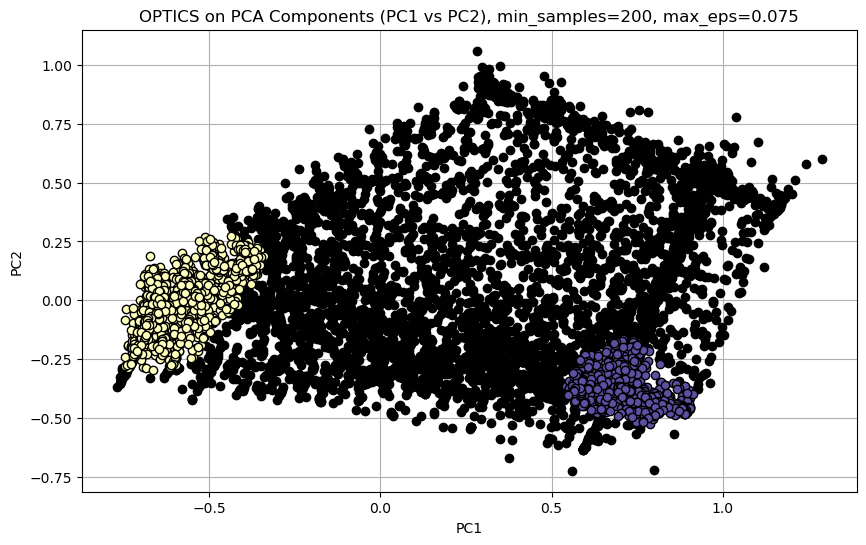

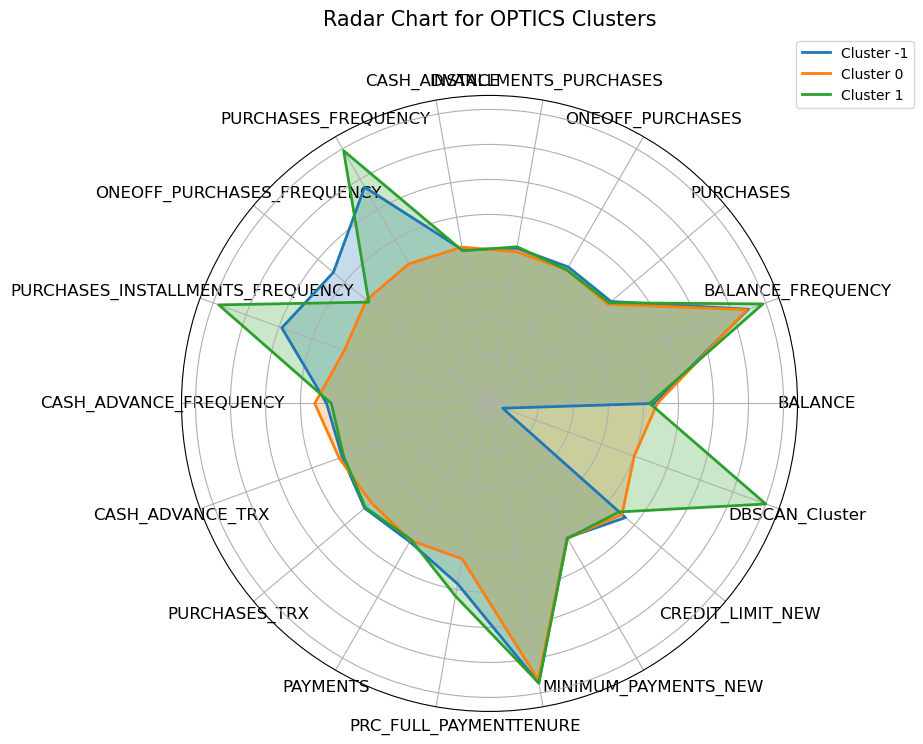

In [43]:
import numpy as np
import pandas as pd
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Apply OPTICS and calculate evaluation metrics
def apply_optics_on_pca(pca_df, min_samples_value, max_eps_value, pc1='PC1', pc2='PC2'):
    optics = OPTICS(min_samples=min_samples_value, max_eps=max_eps_value)
    clusters = optics.fit_predict(pca_df[[pc1, pc2]])

    # Add the cluster labels to the PCA DataFrame
    pca_df['Cluster'] = clusters

    # Visualize the clusters on the first two principal components
    plt.figure(figsize=(10, 6))
    unique_clusters = np.unique(clusters)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_clusters))]

    for k, col in zip(unique_clusters, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Noise points in black
        class_member_mask = (clusters == k)
        xy = pca_df[class_member_mask]
        plt.plot(xy[pc1], xy[pc2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title(f'OPTICS on PCA Components ({pc1} vs {pc2}), min_samples={min_samples_value}, max_eps={max_eps_value}')
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.grid(True)
    plt.show()

    # Return the cluster labels
    return clusters

# Applying OPTICS and adding clusters to df1
clusters = apply_optics_on_pca(pca_df, min_samples_value=200, max_eps_value=0.075)
df1['OPTICS_Cluster'] = clusters  # Add the cluster labels as a new column in df1

# Radar chart for OPTICS clusters
def plot_radar_chart(df, cluster_column, title='Radar Chart'):
    # Calculate the mean of each feature by cluster
    cluster_means = df.groupby(cluster_column).mean()
    
    # Define labels (features) and number of variables
    labels = cluster_means.columns
    num_vars = len(labels)
    
    # Setup angles for radar chart (spaced equally around a circle)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # The plot needs to be a complete loop, so we repeat the first angle at the end
    angles += angles[:1]
    
    # Plotting radar chart for each cluster
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Plot each cluster
    for idx, row in cluster_means.iterrows():
        values = row.tolist()
        values += values[:1]  # Complete the loop by adding the start value at the end
        ax.plot(angles, values, label=f'Cluster {idx}', linewidth=2)
        ax.fill(angles, values, alpha=0.25)
    
    # Set up chart attributes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    
    plt.show()

# Radar chart for OPTICS clusters
plot_radar_chart(df1, 'OPTICS_Cluster', title='Radar Chart for OPTICS Clusters')


# CONCLUSION OF RADAR PLOT
Cluster -1: This cluster might represent customers who are struggling financially. They are using cash advances frequently and have a high balance, indicating they might be relying on credit to manage their expenses.
    
Cluster 0: This cluster might represent customers with a healthy financial situation. They have a balanced credit card usage and are not overly reliant on credit.
    
Cluster 1: This cluster might represent customers who are making significant purchases, possibly for home improvement or other major expenses. They are using installment plans to manage these purchases and have a higher balance as a result.

# HYPERPARAMER TUNING

In [48]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

def evaluate_optics(pca_df, min_samples_value, max_eps_value, pc1='PC1', pc2='PC2'):
    # Apply OPTICS clustering with the given parameters
    optics = OPTICS(min_samples=min_samples_value, max_eps=max_eps_value)
    clusters = optics.fit_predict(pca_df[[pc1, pc2]])

    # If there are multiple clusters (excluding noise)
    if len(set(clusters)) > 1 and len(set(clusters)) < len(pca_df):
        # Silhouette Score
        silhouette_avg = silhouette_score(pca_df[[pc1, pc2]], clusters)

        # Davies-Bouldin Index
        db_index = davies_bouldin_score(pca_df[[pc1, pc2]], clusters)

        # Calinski-Harabasz Index
        ch_index = calinski_harabasz_score(pca_df[[pc1, pc2]], clusters)

        return silhouette_avg, db_index, ch_index
    else:
        return None, None, None  # Return None if not enough clusters

def grid_search_optics(pca_df, param_grid, pc1='PC1', pc2='PC2'):
    best_score = -np.inf  # Initialize the best score
    best_params = None
    best_metrics = None

    # Iterate over all parameter combinations
    for params in ParameterGrid(param_grid):
        min_samples_value = params['min_samples']
        max_eps_value = params['max_eps']

        print(f"Evaluating min_samples={min_samples_value}, max_eps={max_eps_value}...")

        # Evaluate the current set of parameters
        silhouette_avg, db_index, ch_index = evaluate_optics(pca_df, min_samples_value, max_eps_value, pc1, pc2)

        # If the evaluation was successful (not None)
        if silhouette_avg is not None:
            print(f"Silhouette Score: {silhouette_avg:.4f}, Davies-Bouldin Index: {db_index:.4f}, Calinski-Harabasz Index: {ch_index:.4f}")

            # Check if this combination yields a better silhouette score
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = params
                best_metrics = (silhouette_avg, db_index, ch_index)

    print("\nBest Parameters:", best_params)
    print("Best Metrics (Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index):", best_metrics)

# Define the parameter grid for tuning
param_grid = {
    'min_samples': [100, 300, 500, 1000, 2000],  # min_samples values to test
    'max_eps': [0.05, 0.1, 0.2, 0.5, 0.75]  # max_eps values to test
}

# Run grid search
grid_search_optics(pca_df, param_grid)


Evaluating min_samples=100, max_eps=0.05...
Silhouette Score: 0.2871, Davies-Bouldin Index: 0.8972, Calinski-Harabasz Index: 5959.1789
Evaluating min_samples=300, max_eps=0.05...
Silhouette Score: 0.0616, Davies-Bouldin Index: 0.9003, Calinski-Harabasz Index: 2940.5329
Evaluating min_samples=500, max_eps=0.05...
Silhouette Score: 0.2027, Davies-Bouldin Index: 0.7836, Calinski-Harabasz Index: 3196.5660
Evaluating min_samples=1000, max_eps=0.05...
Silhouette Score: 0.1412, Davies-Bouldin Index: 0.8042, Calinski-Harabasz Index: 2463.7330
Evaluating min_samples=2000, max_eps=0.05...
Evaluating min_samples=100, max_eps=0.1...
Silhouette Score: 0.1444, Davies-Bouldin Index: 1.5672, Calinski-Harabasz Index: 622.6623
Evaluating min_samples=300, max_eps=0.1...
Silhouette Score: 0.3625, Davies-Bouldin Index: 0.8960, Calinski-Harabasz Index: 7591.0390
Evaluating min_samples=500, max_eps=0.1...
Silhouette Score: 0.2930, Davies-Bouldin Index: 0.9083, Calinski-Harabasz Index: 5972.4257
Evaluating mi

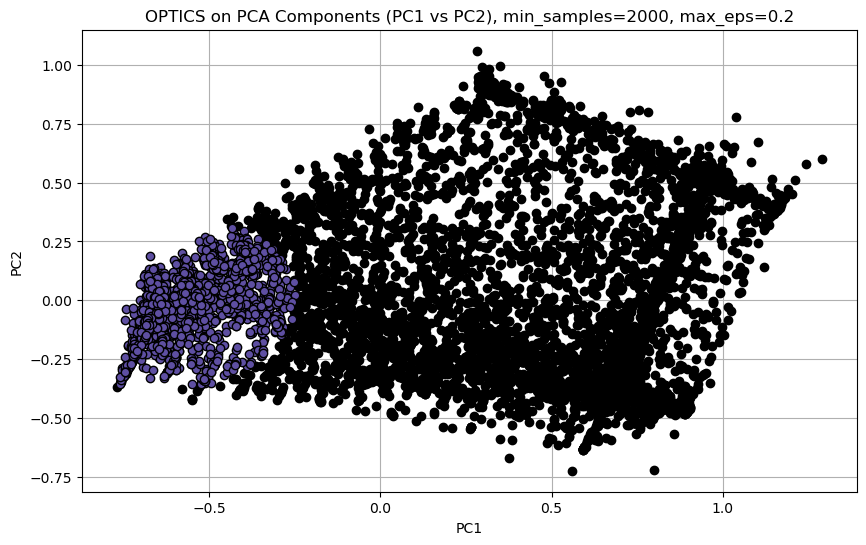

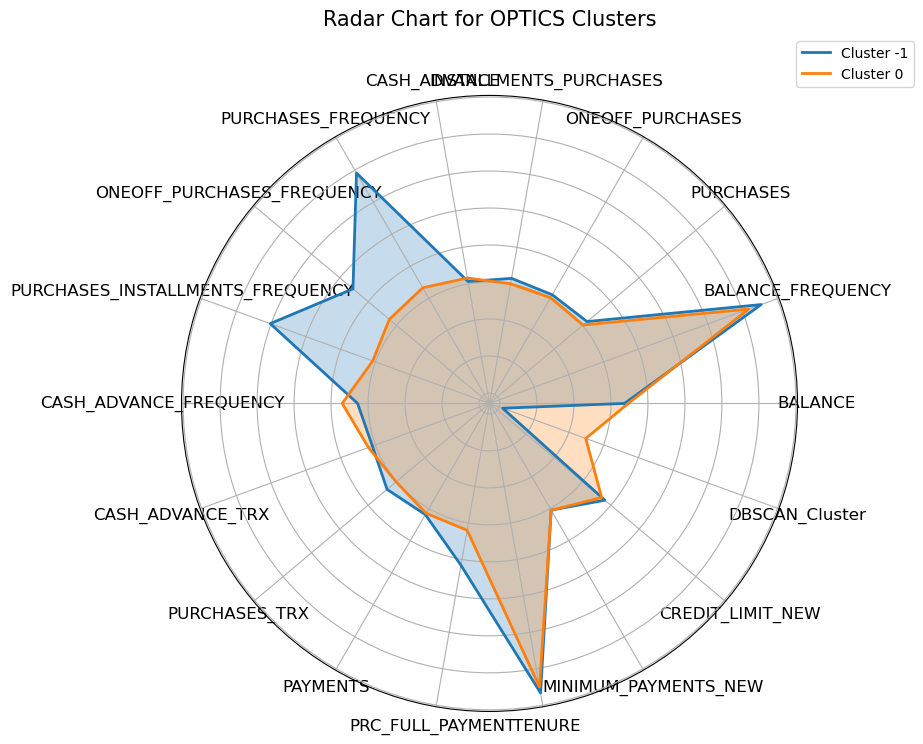

In [49]:
import numpy as np
import pandas as pd
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Apply OPTICS and calculate evaluation metrics
def apply_optics_on_pca(pca_df, min_samples_value, max_eps_value, pc1='PC1', pc2='PC2'):
    optics = OPTICS(min_samples=min_samples_value, max_eps=max_eps_value)
    clusters = optics.fit_predict(pca_df[[pc1, pc2]])

    # Add the cluster labels to the PCA DataFrame
    pca_df['Cluster'] = clusters

    # Visualize the clusters on the first two principal components
    plt.figure(figsize=(10, 6))
    unique_clusters = np.unique(clusters)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_clusters))]

    for k, col in zip(unique_clusters, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Noise points in black
        class_member_mask = (clusters == k)
        xy = pca_df[class_member_mask]
        plt.plot(xy[pc1], xy[pc2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title(f'OPTICS on PCA Components ({pc1} vs {pc2}), min_samples={min_samples_value}, max_eps={max_eps_value}')
    plt.xlabel(pc1)
    plt.ylabel(pc2)
    plt.grid(True)
    plt.show()

    # Return the cluster labels
    return clusters

# Applying OPTICS and adding clusters to df1
clusters = apply_optics_on_pca(pca_df, min_samples_value=2000, max_eps_value=0.2)
df1['OPTICS_Cluster'] = clusters  # Add the cluster labels as a new column in df1

# Radar chart for OPTICS clusters
def plot_radar_chart(df, cluster_column, title='Radar Chart'):
    # Calculate the mean of each feature by cluster
    cluster_means = df.groupby(cluster_column).mean()
    
    # Define labels (features) and number of variables
    labels = cluster_means.columns
    num_vars = len(labels)
    
    # Setup angles for radar chart (spaced equally around a circle)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # The plot needs to be a complete loop, so we repeat the first angle at the end
    angles += angles[:1]
    
    # Plotting radar chart for each cluster
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Plot each cluster
    for idx, row in cluster_means.iterrows():
        values = row.tolist()
        values += values[:1]  # Complete the loop by adding the start value at the end
        ax.plot(angles, values, label=f'Cluster {idx}', linewidth=2)
        ax.fill(angles, values, alpha=0.25)
    
    # Set up chart attributes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_yticklabels([])
    ax.set_title(title, size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    
    plt.show()

# Radar chart for OPTICS clusters
plot_radar_chart(df1, 'OPTICS_Cluster', title='Radar Chart for OPTICS Clusters')


# RADAR PLOT AFTER TUNING

Cluster -1: This cluster might represent customers who are active spenders. They are making frequent purchases, especially installment purchases, and have a higher balance as a result.

Cluster 0: This cluster might represent customers with a more moderate spending behavior. They have a balanced credit card usage and are not overly reliant on credit.

# CONCLUSION

OPTICS tends to perform better than DBSCAN as it captures more insightful features, particularly in handling varying densities. However, in this case, both DBSCAN and OPTICS produced unsatisfactory results due to the dataset's high density nature. This makes K-Means a better option for clustering this dataset.

When comparing DBSCAN and OPTICS, the latter often demonstrates superior performance, but achieving satisfying results requires careful tuning of parameters like min_samples, xi, and eps.